In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import skew, norm, probplot, boxcox, f_oneway
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/NASA/Astroid/nasa.csv")
data1=df
df.info()
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.300,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.300,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.400,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.600,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4682,3759007,3759007,23.900,0.044112,0.098637,44.111820,98.637028,0.027410,0.061290,144.723824,...,164.183305,457.179984,0.741558,276.395697,1.581299,2.457708e+06,304.306025,0.787436,J2000,False
4683,3759295,3759295,28.200,0.006089,0.013616,6.089126,13.615700,0.003784,0.008460,19.977449,...,345.225230,407.185767,0.996434,42.111064,1.153835,2.458088e+06,282.978786,0.884117,J2000,False
4684,3759714,3759714,22.700,0.076658,0.171412,76.657557,171.411509,0.047633,0.106510,251.501180,...,37.026468,690.054279,0.965760,274.692712,2.090708,2.458300e+06,203.501147,0.521698,J2000,False
4685,3759720,3759720,21.800,0.116026,0.259442,116.025908,259.441818,0.072095,0.161210,380.662441,...,163.802910,662.048343,1.185467,180.346090,1.787733,2.458288e+06,203.524965,0.543767,J2000,False


In [ ]:
# Convert results from boolean to numerical values (binary)
df['Hazardous'] = df['Hazardous'].astype('int64')

# Hazardous would result in 1, not hazardous would be 0.

In [ ]:
# Drop Repeated Features
df = df.drop(columns=['Close Approach Date','Orbit Determination Date','Neo Reference ID', 'Name', 'Orbiting Body', 'Orbit ID',
                      'Orbit Determination Date', 'Equinox',"Est Dia in KM(max)",'Est Dia in Feet(max)','Est Dia in M(min)',
                      'Est Dia in M(max)',"Est Dia in Miles(min)","Est Dia in Miles(max)","Est Dia in Feet(min)","Est Dia in Feet(min)",
                      'Relative Velocity km per hr',"Miles per hour","Miss Dist.(lunar)","Miss Dist.(kilometers)","Miss Dist.(miles)"])

# Some values are not important, such as orbit determination date - this is unrelated to the asteroid itself
# Other values represent the same aspect, expressed in different units (such as in km, ft, m, etc.). Thus, we can directly drop these values

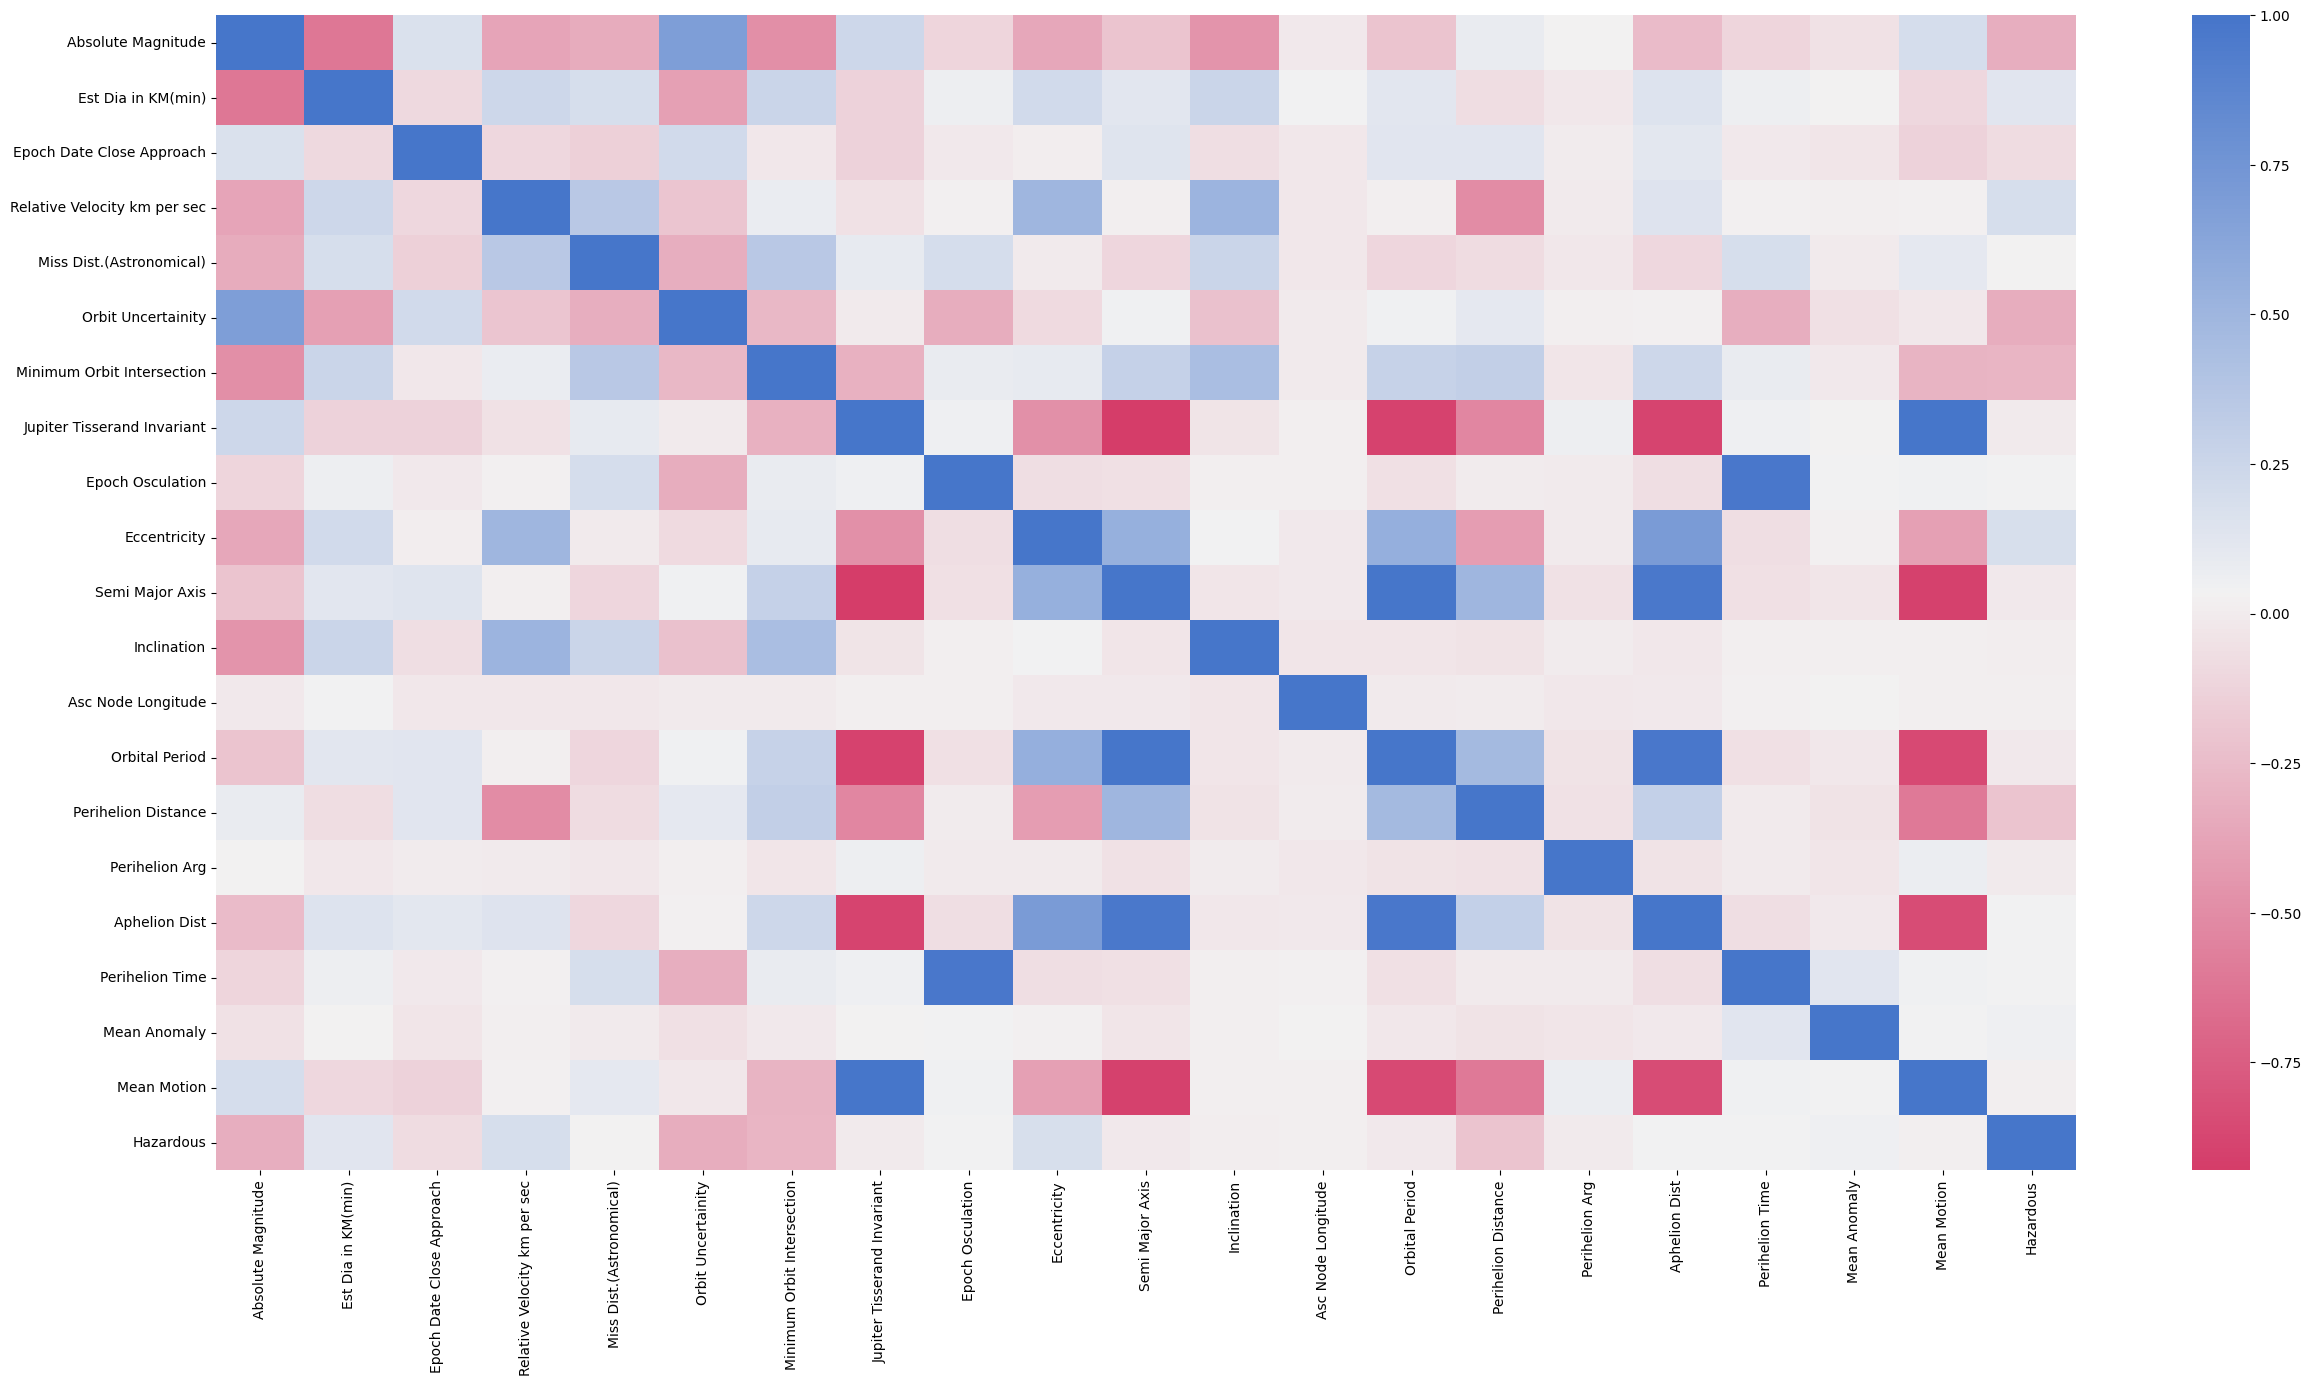

In [ ]:
# Correlation Heatmap
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)
feature_lst = list(df.columns)
correlations = df[feature_lst].corr()
fig, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(correlations, cmap=cmap)
plt.show()

In [ ]:
# get features dataframe
X = df.drop('Hazardous',axis=1)    # Features

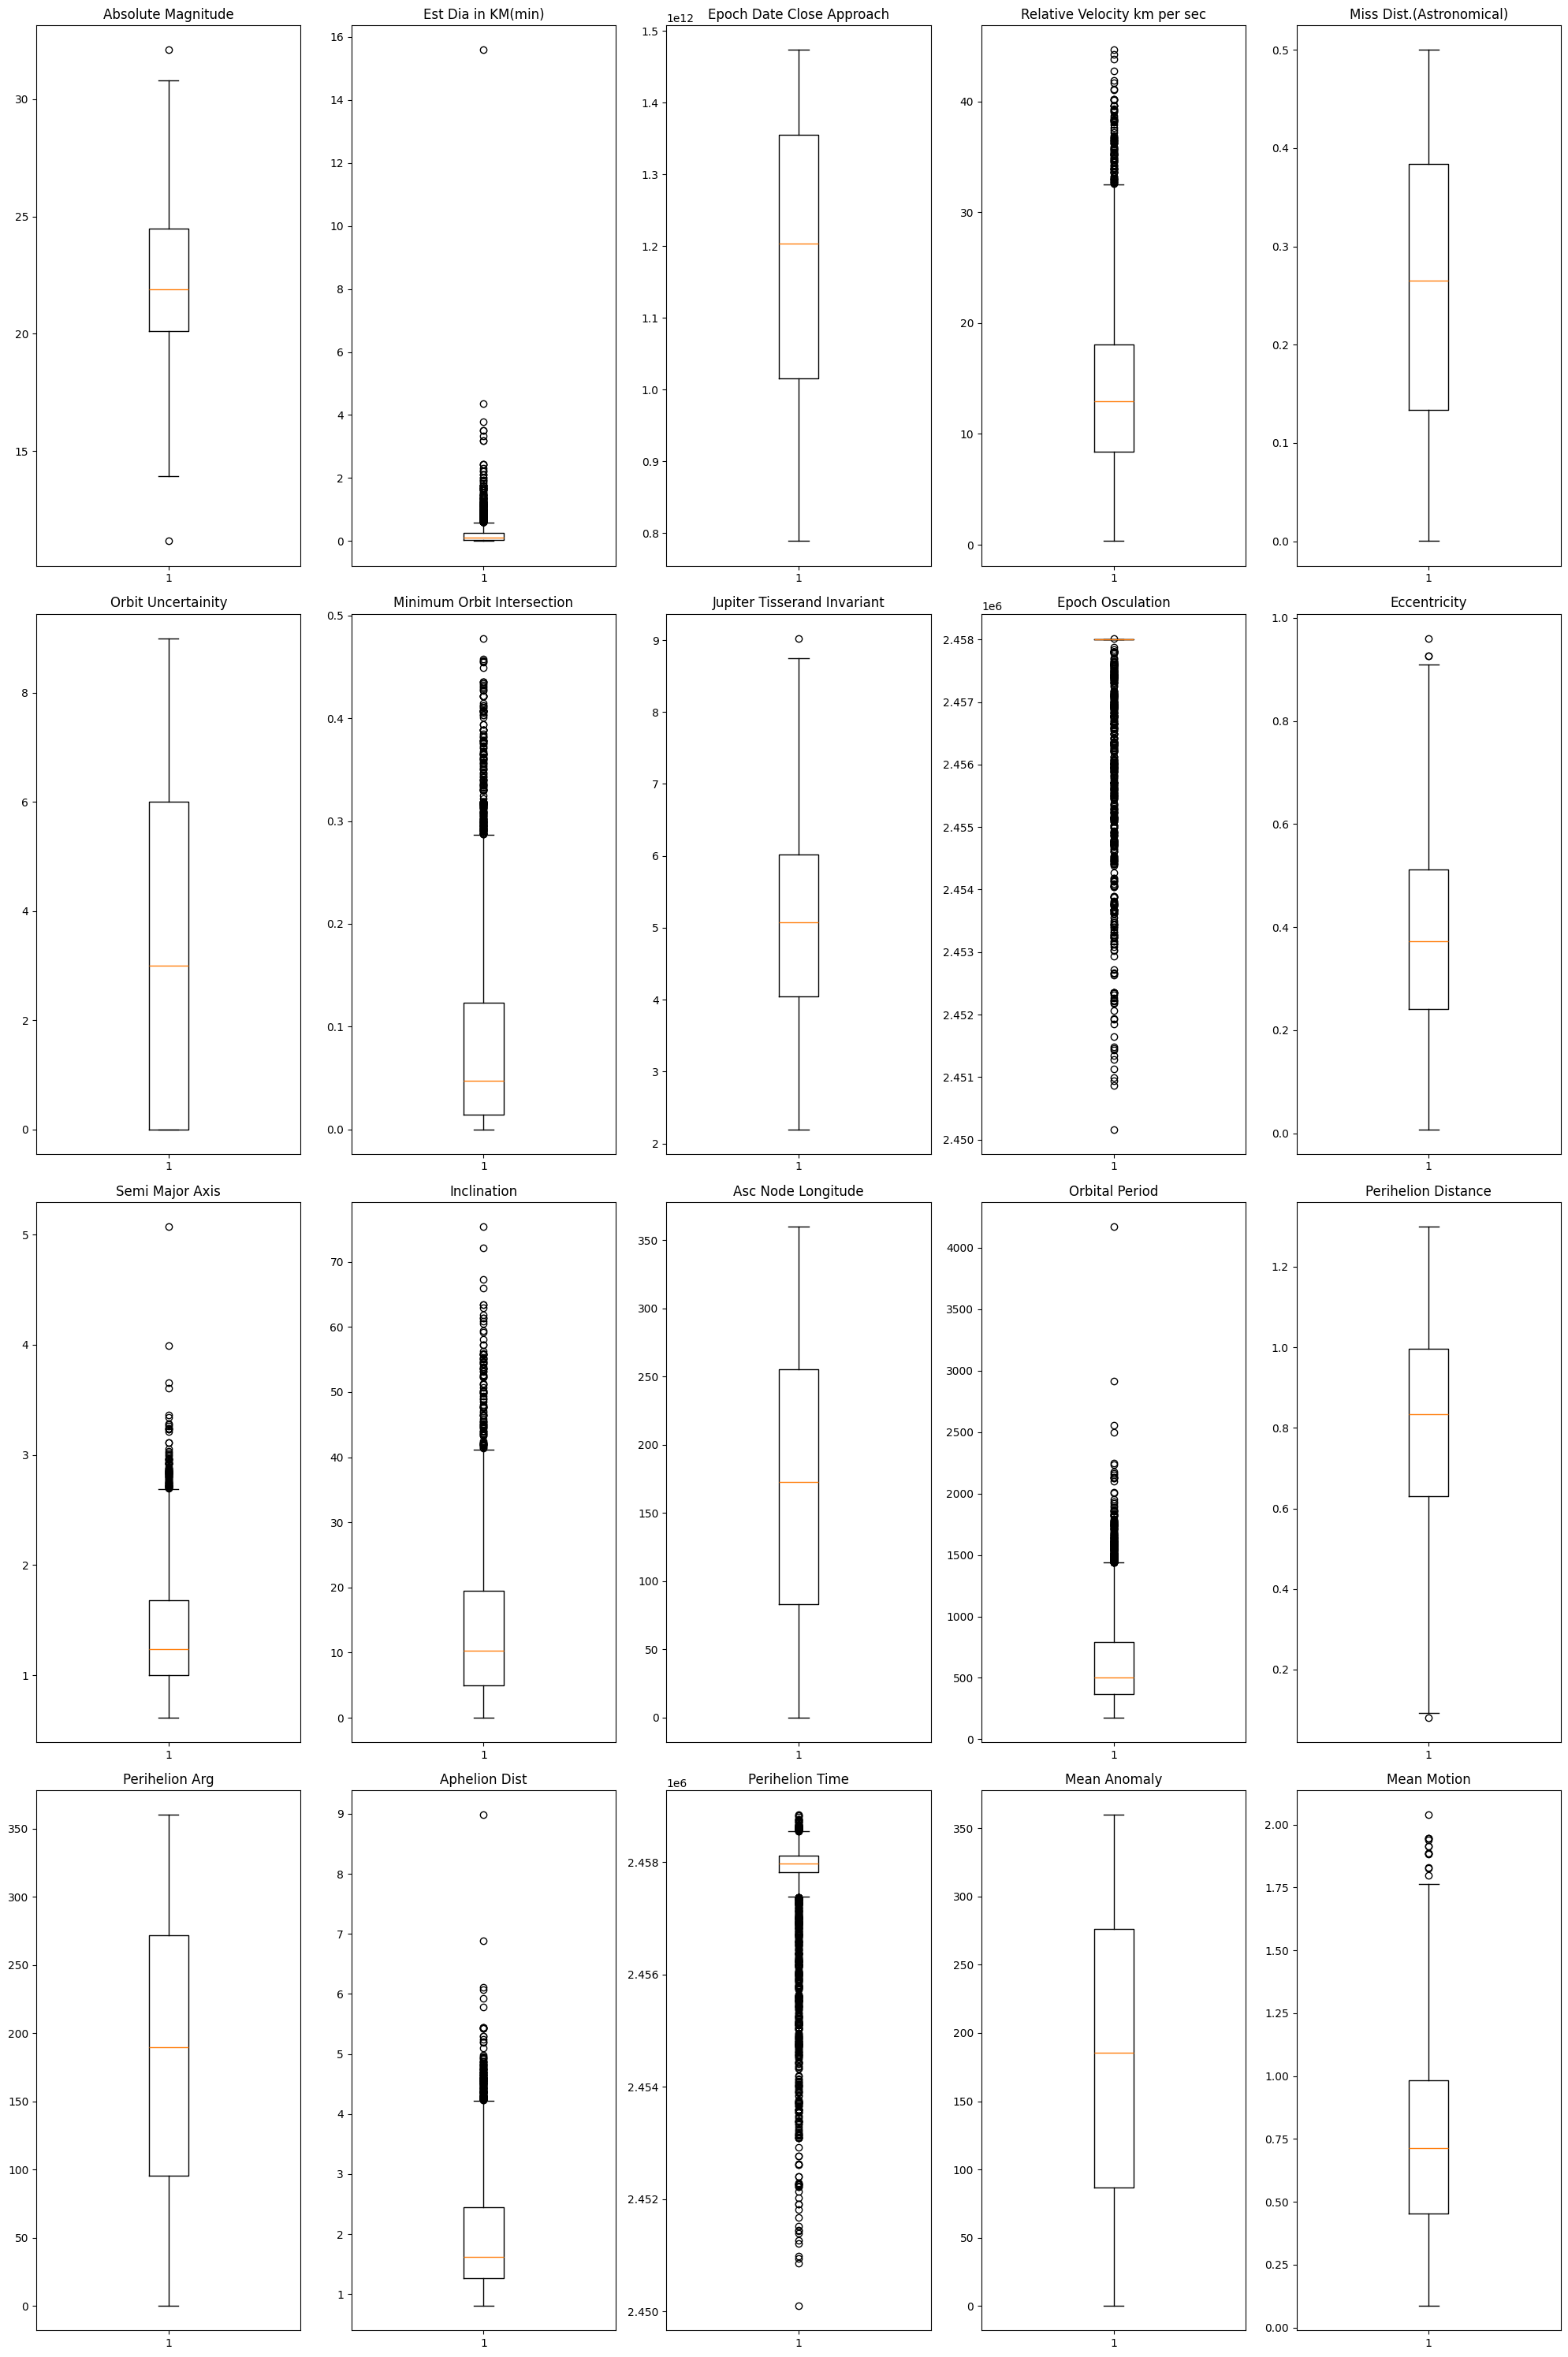

In [ ]:
# Detecting outlier in data using box plots

plt.figure(figsize=(20,30))

for i, variable in enumerate(X):
                     plt.subplot(4,5,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [ ]:
# Use flooring and capping method
def treat_outliers(df,col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    df[col] = np.clip(df[col], Lower_Whisker, Upper_Whisker)
    return df

def treat_outliers_all(df, col_list):
    for c in col_list:
        df = treat_outliers(df,c)
    return df

In [ ]:
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
del numerical_col[-1] # Here, I have to remove the results from the list of features to be floored and capped. This is because with this currently imbalanced dataset, all instances of "1" might be eliminated to remove outliers.
df = treat_outliers_all(df,numerical_col)

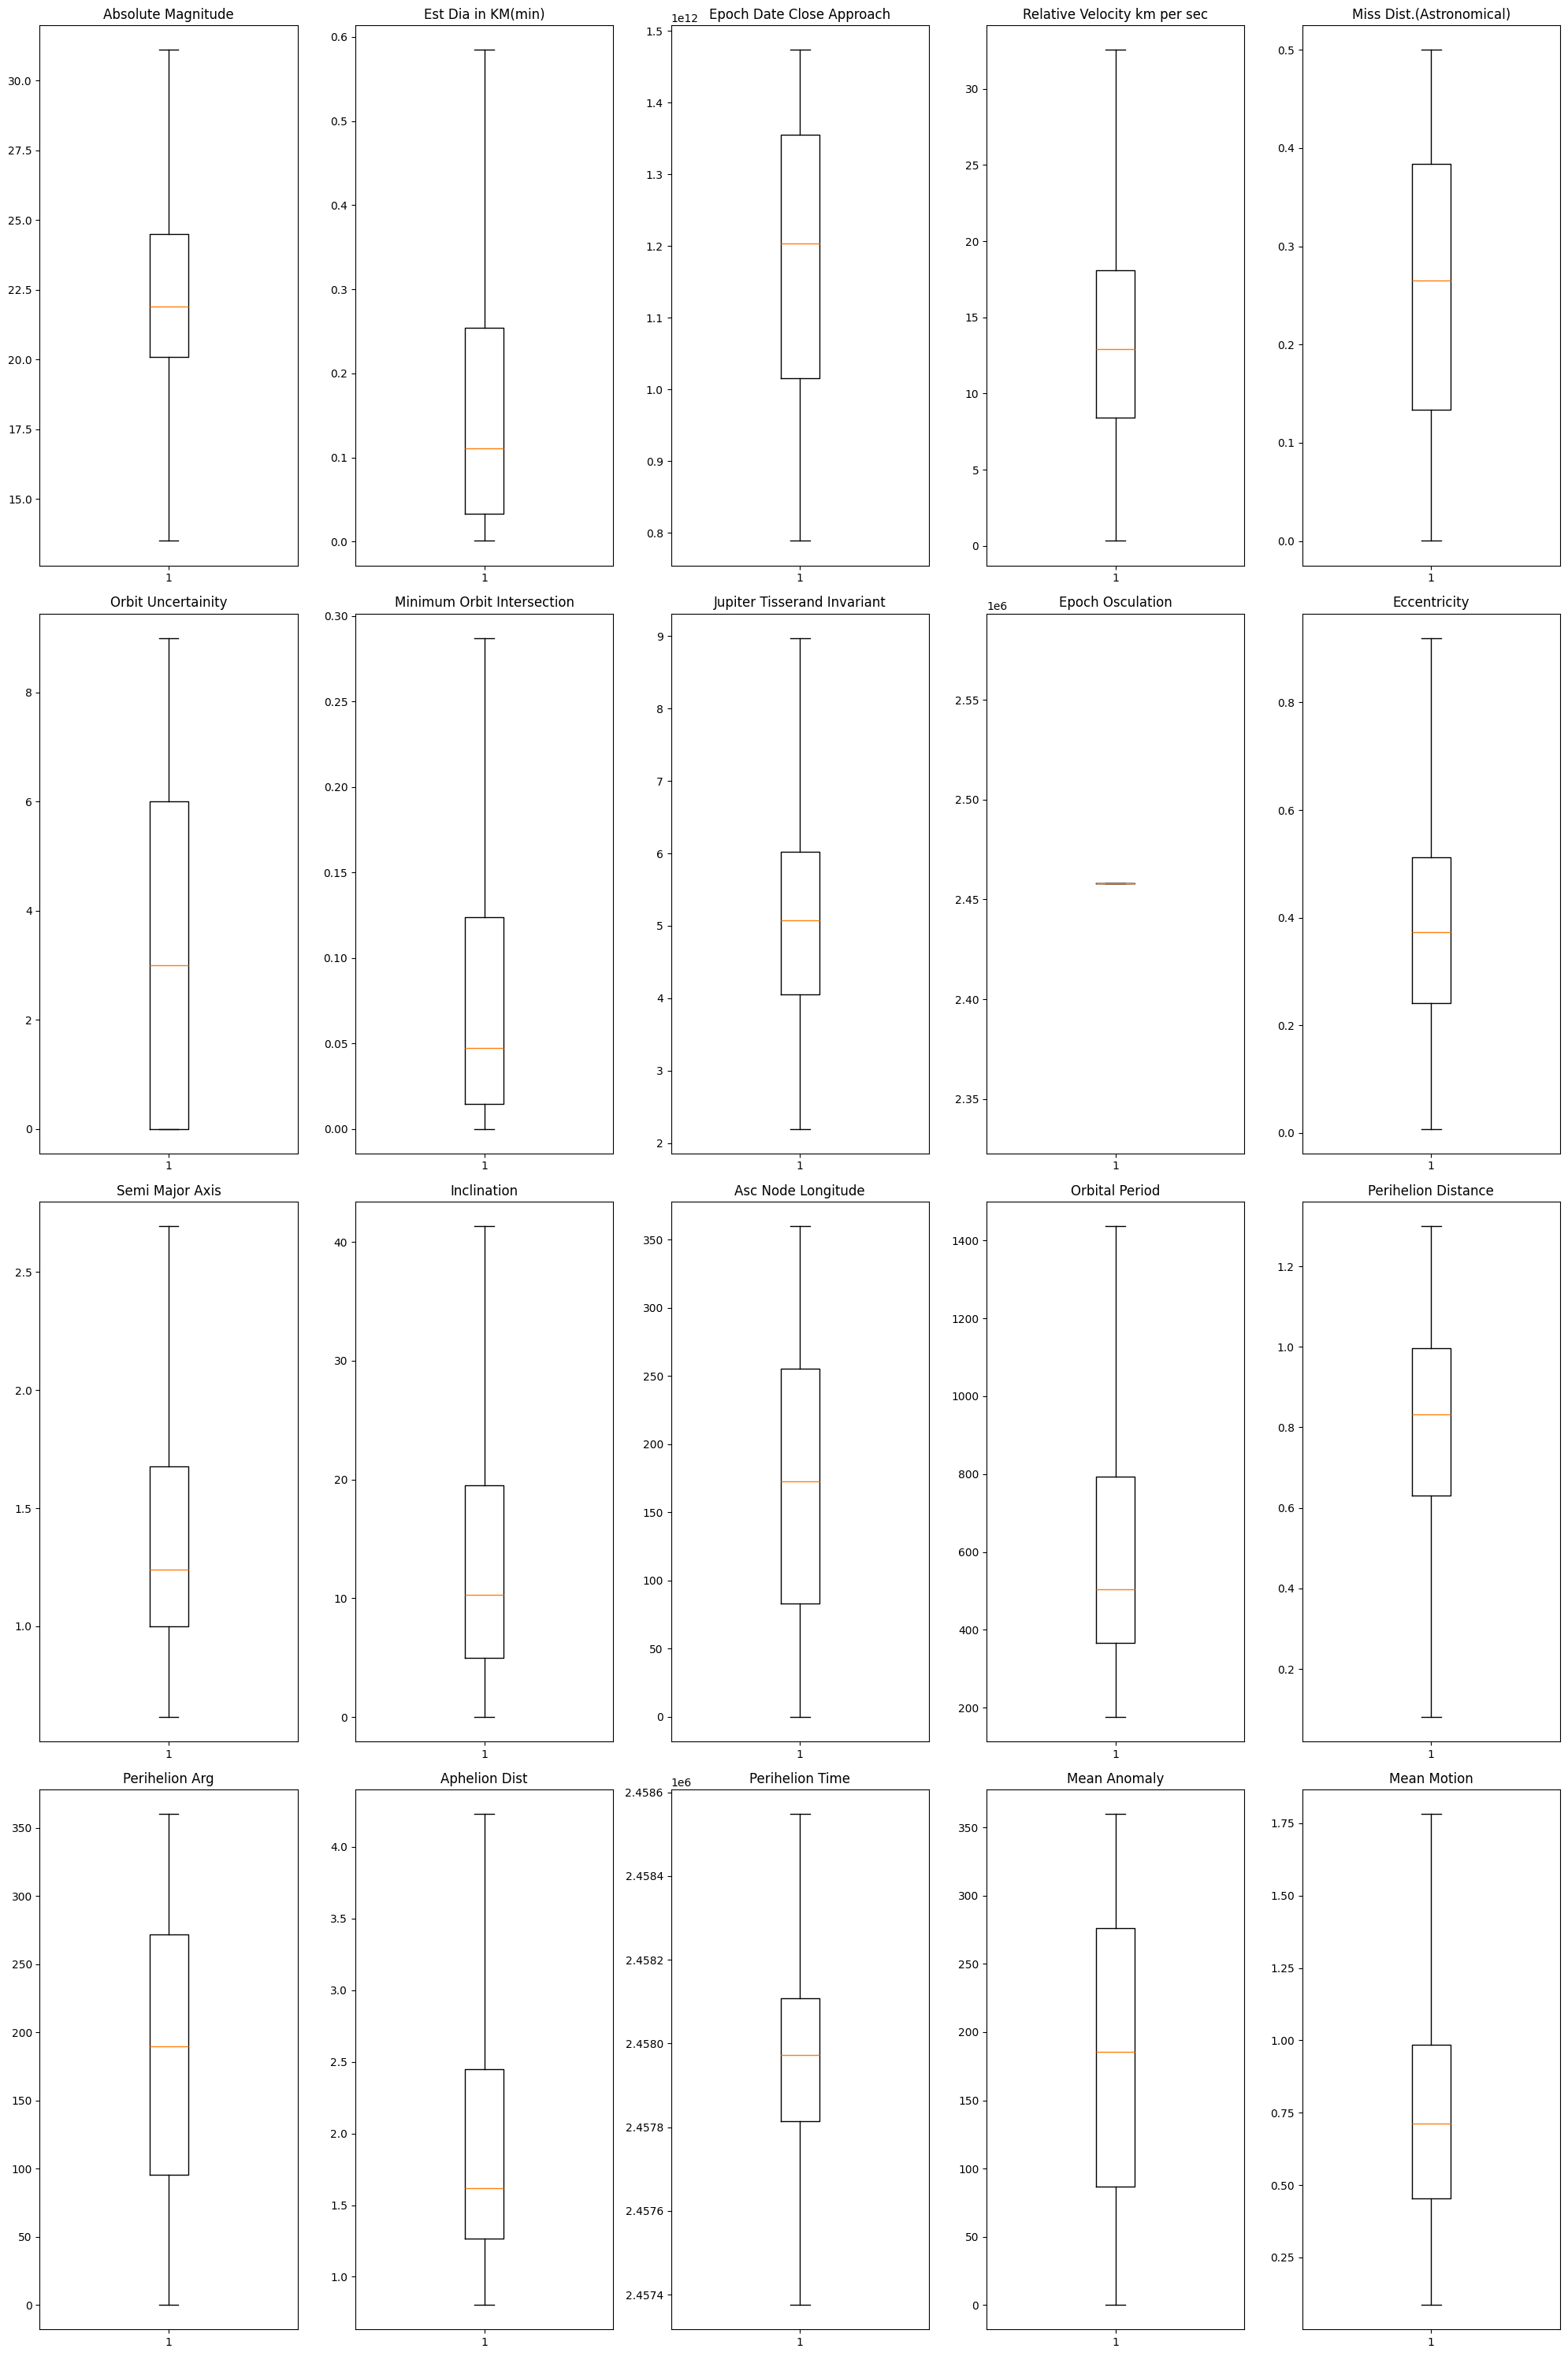

In [ ]:
# get features dataframe
X = df.drop('Hazardous',axis=1)    # Features

# Plot Box Plot
plt.figure(figsize=(20,30))

for i, variable in enumerate(X):
                     plt.subplot(4,5,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

In [ ]:
# Estimated Diameter
df["Log_ESTDIA"] = df["Est Dia in KM(min)"].map(lambda i: np.log(i) if i > 0 else 0)    # Log Transformation
print(df['Est Dia in KM(min)'].skew())
print(df['Log_ESTDIA'].skew())

1.163280088795182
-0.38831918367636453


In [ ]:
# Minimum Orbit Intersection
df["Log_Orbit"] = df["Minimum Orbit Intersection"].map(lambda i: np.log(i) if i > 0 else 0)    # Log Transformation
print(df['Minimum Orbit Intersection'].skew())
print(df['Log_Orbit'].skew())

1.1477309463959624
-1.114641485848336


In [ ]:
# Delete Log Results
df = df.drop(["Log_Orbit"],axis=1)

In [ ]:
# Minimum Orbit Intersection
df["sqrt_Orbit"] = df["Minimum Orbit Intersection"].map(lambda i: np.sqrt(i) if i > 0 else 0)    # Square Root Transformation
print(df['Minimum Orbit Intersection'].skew())
print(df['sqrt_Orbit'].skew())

1.1477309463959624
0.4289907326069241


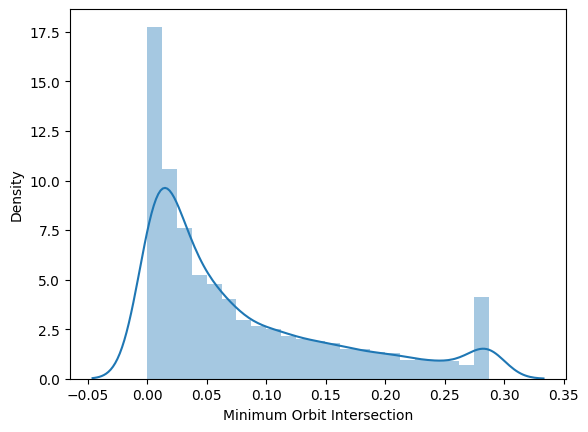

In [ ]:
sns.distplot(df['Minimum Orbit Intersection'])
plt.show()

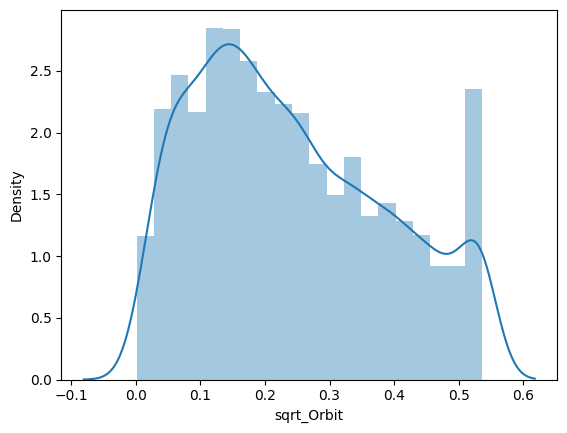

In [ ]:
sns.distplot(df['sqrt_Orbit'])
plt.show()

In [ ]:
df = df.drop(["Est Dia in KM(min)",'Minimum Orbit Intersection'],axis=1)

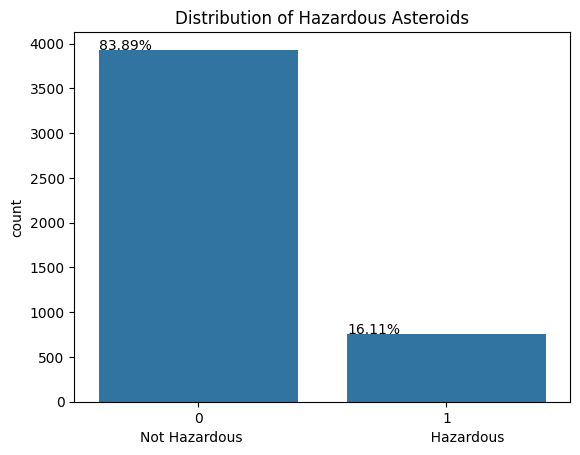

In [ ]:
ax = sns.countplot(x = "Hazardous", data = df)
plt.title('Distribution of Hazardous Asteroids')
plt.xlabel('Not Hazardous                                           Hazardous')
total = len(df["Hazardous"])
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x()
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))

,Absolute Magnitude,Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Jupiter Tisserand Invariant,Epoch Osculation,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Log_ESTDIA,sqrt_Orbit
1153,23.2,1010476800000,5.944328,0.154530,5,3.726,2458000.5,0.446702,1.982718,4.387161,137.726415,1019.740701,1.097033,319.129361,2.868402,2.458399e+06,219.215645,0.353031,-2.798666,0.353901
2942,23.9,1286521200000,5.737227,0.109408,5,4.885,2458000.5,0.188758,1.332264,9.907647,30.825112,561.673138,1.080788,319.278271,1.583739,2.458260e+06,193.585809,0.640942,-3.121028,0.331290
454,24.0,884851200000,11.478175,0.303668,8,5.201,2458000.5,0.185005,1.204753,21.173628,269.562554,482.998092,0.981867,313.469527,1.427639,2.457375e+06,36.229800,0.745345,-3.167079,0.122919
4429,23.7,1449561600000,8.824686,0.245091,7,6.122,2458000.5,0.158046,0.981694,16.608528,271.076356,355.273112,0.826541,292.629843,1.136847,2.457844e+06,158.239989,1.013305,-3.028924,0.179429
17,21.0,792835200000,20.019242,0.478087,1,6.469,2458000.5,0.452792,0.907865,8.278696,114.379829,315.958501,0.496791,7.392327,1.318939,2.457969e+06,36.167563,1.139390,-1.785528,0.313716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4662,19.3,1470639600000,23.065959,0.058309,1,3.921,2458000.5,0.574790,1.647586,34.116306,138.565536,772.450559,0.700571,100.270236,2.594602,2.458331e+06,205.762131,0.466049,-1.002649,0.096704
4663,21.5,1470639600000,14.754489,0.120808,2,5.786,2458000.5,0.095001,1.037464,29.922212,136.762870,385.973723,0.938903,39.290250,1.136024,2.457848e+06,142.264753,0.932706,-2.015787,0.163168
4665,20.2,1471244400000,12.622398,0.189567,0,4.304,2458000.5,0.376807,1.573764,11.682160,169.500723,721.120395,0.980758,196.948416,2.166770,2.457645e+06,177.326778,0.499223,-1.417115,0.114303
4668,21.6,1471244400000,17.154758,0.390278,1,4.478,2458000.5,0.562406,1.439534,7.159010,54.443592,630.857755,0.629932,256.055109,2.249136,2.458240e+06,223.131665,0.570652,-2.061838,0.166518


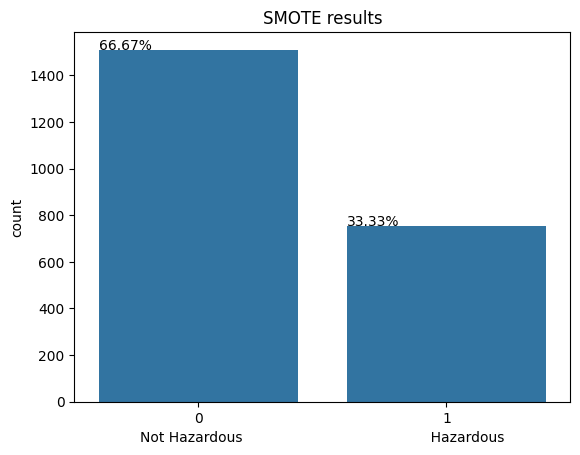

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy import where

# Undersample majority class
under = RandomUnderSampler(sampling_strategy=0.5)

# transform the dataset
FEATURES = list(df.columns)
del FEATURES[-3]

X_SMOTE, y_SMOTE = under.fit_resample(df.loc[:, FEATURES], df["Hazardous"])
# plotting label distribution after SMOTE
ax = sns.countplot(x='Hazardous', data = pd.DataFrame(y_SMOTE))
plt.title('SMOTE results')
plt.xlabel('Not Hazardous                                           Hazardous')
total = len(y_SMOTE)
for p in ax.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x_coord = p.get_x()
        y_coord = p.get_y() + p.get_height()+0.02
        ax.annotate(percentage, (x_coord, y_coord))
X_SMOTE

In [ ]:
from sklearn.model_selection import train_test_split
import scipy.stats as stats
from scipy.stats import stats, norm, skew
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model
from sklearn import metrics
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
# Libraries for different classifiers
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

# Libraries for model tuning and evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall, Precision AND F1
def get_metrics_score(model,flag=True):
    # defining an empty list to store train and test results
    score_list=[]

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)

    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    # Recall = minimizes false negatives

    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    # Precision = minimizes false positives

    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)

    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1, test_f1))

    if flag == True:
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("F1-Score on training set : ",metrics.f1_score(y_train,pred_train))
        print("F1-Score on test set : ",metrics.f1_score(y_test,pred_test))

    return score_list # returns the list with train and test scores

In [ ]:
# Function to make confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X_SMOTE, y_SMOTE, test_size=0.3, random_state=1)
print(X_train.shape, X_test.shape)

(1585, 20) (680, 20)


In [ ]:
d_tree = DecisionTreeClassifier(criterion='gini',class_weight={0:0.15,1:0.85},random_state=1)

d_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.15, 1: 0.85}, random_state=1)

Accuracy on training set :  1.0
Accuracy on test set :  0.9941176470588236
Recall on training set :  1.0
Recall on test set :  0.986046511627907
Precision on training set :  1.0
Precision on test set :  0.9953051643192489
F1-Score on training set :  1.0
F1-Score on test set :  0.9906542056074766


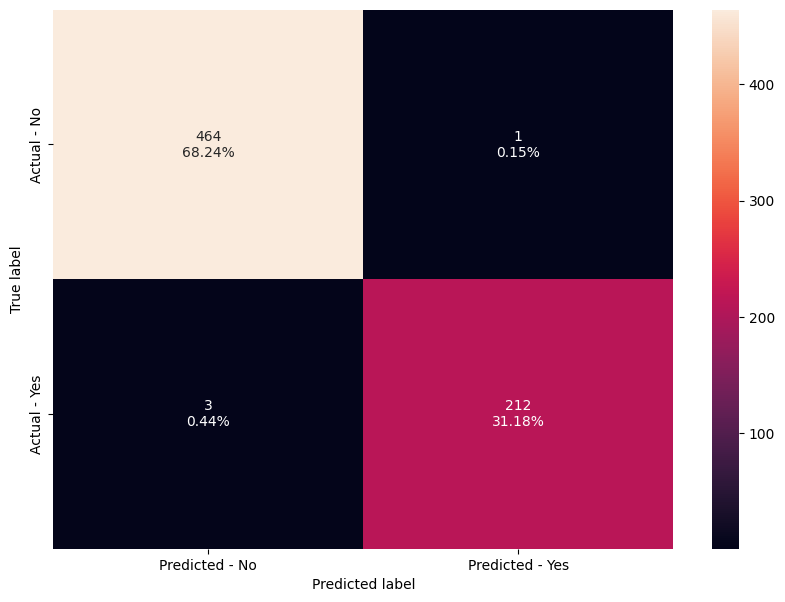

In [ ]:
# Calculate metrics
get_metrics_score(d_tree)

# Create the confusion matrix
make_confusion_matrix(d_tree,y_test)

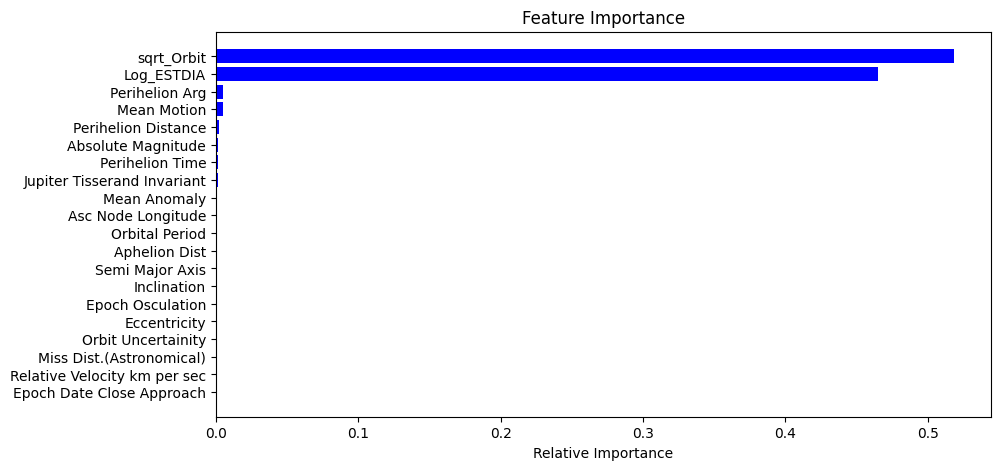

In [ ]:
# Feature Importance
importances = d_tree.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,5))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [FEATURES[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 74.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 85.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

Train shape: (729, 10)  Test shape: (313, 10)
Train labels (counts): [370 359]
Test labels (counts):  [151 162]
epoch 0  | loss: 0.93121 | val_0_auc: 0.49011 |  0:00:00s
epoch 1  | loss: 0.76453 | val_0_auc: 0.48214 |  0:00:01s
epoch 2  | loss: 0.73997 | val_0_auc: 0.53033 |  0:00:01s
epoch 3  | loss: 0.69768 | val_0_auc: 0.47237 |  0:00:01s
epoch 4  | loss: 0.6927  | val_0_auc: 0.47956 |  0:00:02s
epoch 5  | loss: 0.68688 | val_0_auc: 0.48643 |  0:00:02s
epoch 6  | loss: 0.67508 | val_0_auc: 0.48136 |  0:00:03s
epoch 7  | loss: 0.65839 | val_0_auc: 0.55184 |  0:00:03s
epoch 8  | loss: 0.67436 | val_0_auc: 0.52481 |  0:00:04s
epoch 9  | loss: 0.63813 | val_0_auc: 0.49039 |  0:00:04s
epoch 10 | loss: 0.67411 | val_0_auc: 0.47887 |  0:00:05s
epoch 11 | loss: 0.63994 | val_0_auc: 0.49313 |  0:00:05s
epoch 12 | loss: 0.6551  | val_0_auc: 0.46529 |  0:00:06s
epoch 13 | loss: 0.65183 | val_0_auc: 0.46272 |  0:00:06s
epoch 14 | loss: 0.64918 | val_0_auc: 0.51083 |  0:00:07s
epoch 15 | loss: 0

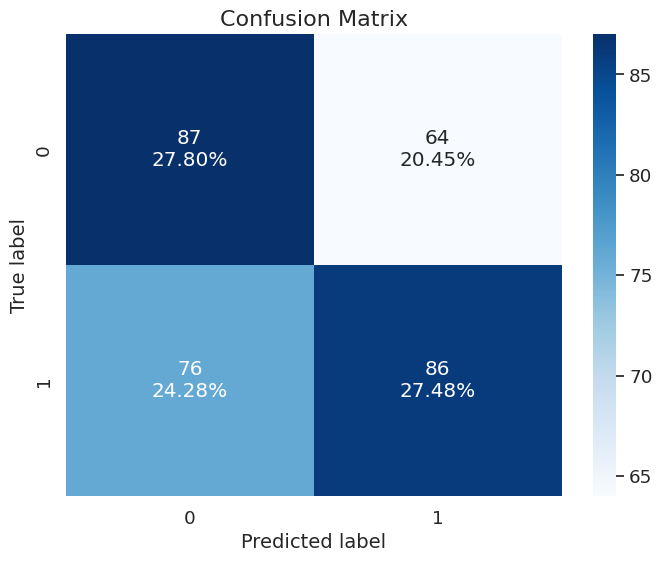

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pytorch_tabnet.tab_model import TabNetClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
)
from sklearn.preprocessing import StandardScaler

# 1) Create a synthetic dataset (all numeric features)
np.random.seed(0)
X = np.random.rand(1000, 10)
y = np.random.randint(0, 2, 1000)  # binary target

# 2) Apply SMOTE to balance the dataset
smote = SMOTE(random_state=1)
X_smote, y_smote = smote.fit_resample(X, y)

# 3) Split into train/test
X_train_np, X_test_np, y_train_np, y_test_np = train_test_split(
    X_smote, y_smote, test_size=0.3, random_state=1
)
print("Train shape:", X_train_np.shape, " Test shape:", X_test_np.shape)
print("Train labels (counts):", np.bincount(y_train_np))
print("Test labels (counts): ", np.bincount(y_test_np))

# 4) Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_np)
X_test_scaled = scaler.transform(X_test_np)

# 5) Define a higher-capacity TabNet model
tabnet = TabNetClassifier(
    n_d=16,
    n_a=16,
    n_steps=4,
    cat_idxs=[],
    cat_dims=[],
    device_name="auto"
)

# 6) Train the model with automated class weighting
tabnet.fit(
    X_train_scaled, y_train_np,
    eval_set=[(X_test_scaled, y_test_np)],
    max_epochs=250,
    patience=25,
    batch_size=128,
    weights=1  # Automated class weighting
)

# 7) Define a function to evaluate metrics
def get_metrics_score(model):
    pred_train = model.predict(X_train_scaled)
    pred_test = model.predict(X_test_scaled)

    train_acc = accuracy_score(y_train_np, pred_train)
    test_acc = accuracy_score(y_test_np, pred_test)

    train_recall = recall_score(y_train_np, pred_train)
    test_recall = recall_score(y_test_np, pred_test)

    train_precision = precision_score(y_train_np, pred_train)
    test_precision = precision_score(y_test_np, pred_test)

    train_f1 = f1_score(y_train_np, pred_train)
    test_f1 = f1_score(y_test_np, pred_test)

    print(f"Accuracy:  Train = {train_acc:.4f}, Test = {test_acc:.4f}")
    print(f"Recall:    Train = {train_recall:.4f}, Test = {test_recall:.4f}")
    print(f"Precision: Train = {train_precision:.4f}, Test = {test_precision:.4f}")
    print(f"F1-Score:  Train = {train_f1:.4f}, Test = {test_f1:.4f}")

# 8) Define a function for the confusion matrix
def make_confusion_matrix(model):
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test_np, y_pred)

    group_counts = [f"{value:0.0f}" for value in cm.flatten()]
    group_percentages = [f"{(value / cm.sum()):.2%}" for value in cm.flatten()]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(cm.shape[0], cm.shape[1])

    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)
    sns.heatmap(cm, annot=labels, fmt='', cmap="Blues")
    plt.ylabel("True label", fontsize=14)
    plt.xlabel("Predicted label", fontsize=14)
    plt.title("Confusion Matrix", fontsize=16)
    plt.show()

# 9) Print metrics
get_metrics_score(tabnet)

# 10) Confusion matrix
make_confusion_matrix(tabnet)


In [ ]:
! pip install pytorch_tabnet

In [ ]:
# Split the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.3, random_state=1)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model
rf_model = RandomForestClassifier(random_state=1)
rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=1)

In [ ]:
from sklearn.metrics import classification_report
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       465
           1       1.00      1.00      1.00       215

    accuracy                           1.00       680
   macro avg       1.00      1.00      1.00       680
weighted avg       1.00      1.00      1.00       680



GRAPHSAGE

In [ ]:
from torch_geometric.nn import SAGEConv

class GraphSAGEAsteroidClassifier(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGEAsteroidClassifier, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        return F.log_softmax(x, dim=1)

# Initialize and train GraphSAGE model
sage_model = GraphSAGEAsteroidClassifier(
    in_channels=X_train_scaled.shape[1],
    hidden_channels=64,
    out_channels=2
).to(device)

optimizer = torch.optim.Adam(sage_model.parameters(), lr=0.01)

# Training loop
sage_model.train()
for epoch in range(75):
    optimizer.zero_grad()
    out = sage_model(graph_train.x, graph_train.edge_index)
    loss = F.nll_loss(out, graph_train.y)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 5 == 0:
        print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')

# Evaluation
sage_model.eval()
with torch.no_grad():
    # Training set
    train_pred = sage_model(graph_train.x, graph_train.edge_index).max(dim=1)[1]
    train_acc = accuracy_score(graph_train.y.cpu().numpy(), train_pred.cpu().numpy())

    # Test set
    test_pred = sage_model(graph_test.x, graph_test.edge_index).max(dim=1)[1]
    test_acc = accuracy_score(graph_test.y.cpu().numpy(), test_pred.cpu().numpy())

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")


Epoch: 5, Loss: 0.4948
Epoch: 10, Loss: 0.3766
Epoch: 15, Loss: 0.2978
Epoch: 20, Loss: 0.2361
Epoch: 25, Loss: 0.1932
Epoch: 30, Loss: 0.1562
Epoch: 35, Loss: 0.1336
Epoch: 40, Loss: 0.1085
Epoch: 45, Loss: 0.0898
Epoch: 50, Loss: 0.0826
Epoch: 55, Loss: 0.0717
Epoch: 60, Loss: 0.0579
Epoch: 65, Loss: 0.0506
Epoch: 70, Loss: 0.0494
Epoch: 75, Loss: 0.0451
Train Accuracy: 0.9994
Test Accuracy: 0.9632


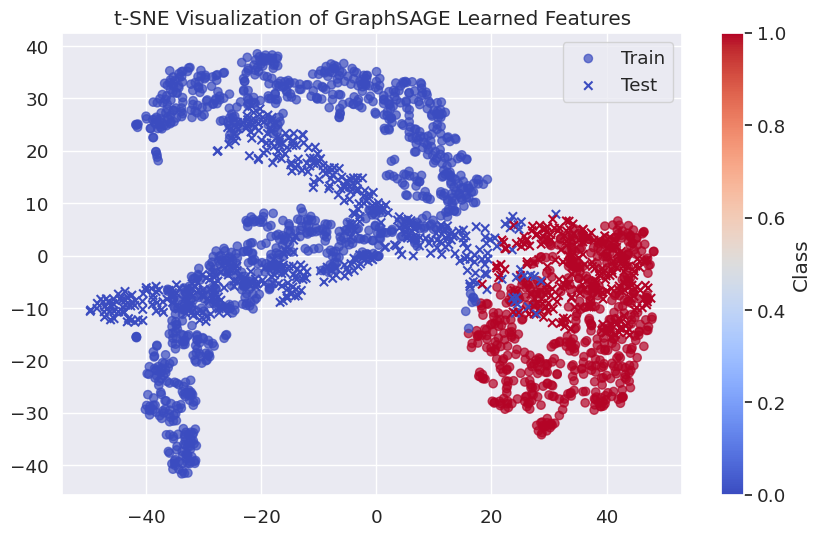

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Set model to evaluation mode
sage_model.eval()

# Extract learned node embeddings from the penultimate layer (hidden representations)
with torch.no_grad():
    train_embeddings = sage_model.conv1(graph_train.x, graph_train.edge_index)
    train_embeddings = F.relu(train_embeddings)
    train_embeddings = sage_model.conv2(train_embeddings, graph_train.edge_index)

    test_embeddings = sage_model.conv1(graph_test.x, graph_test.edge_index)
    test_embeddings = F.relu(test_embeddings)
    test_embeddings = sage_model.conv2(test_embeddings, graph_test.edge_index)

# Convert to NumPy for t-SNE
train_embeddings_np = train_embeddings.cpu().numpy()
test_embeddings_np = test_embeddings.cpu().numpy()

# Apply t-SNE for 2D visualization
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
train_embeddings_2d = tsne.fit_transform(train_embeddings_np)
test_embeddings_2d = tsne.fit_transform(test_embeddings_np)

# Convert labels to NumPy
train_labels = graph_train.y.cpu().numpy()
test_labels = graph_test.y.cpu().numpy()

# Plot t-SNE clusters
plt.figure(figsize=(10, 6))
plt.scatter(train_embeddings_2d[:, 0], train_embeddings_2d[:, 1], c=train_labels, cmap="coolwarm", alpha=0.7, label="Train")
plt.scatter(test_embeddings_2d[:, 0], test_embeddings_2d[:, 1], c=test_labels, cmap="coolwarm", marker="x", label="Test")
plt.title("t-SNE Visualization of GraphSAGE Learned Features")
plt.legend()
plt.colorbar(label="Class")
plt.show()


In [ ]:
# import matplotlib.pyplot as plt

# # Initialize list to store loss values
# loss_values = []

# # Training loop
# sage_model.train()
# for epoch in range(75):
#     optimizer.zero_grad()
#     out = sage_model(graph_train.x, graph_train.edge_index)
#     loss = F.nll_loss(out, graph_train.y)
#     loss.backward()
#     optimizer.step()

#     # Store loss value
#     loss_values.append(loss.item())

#     if (epoch + 1) % 5 == 0:
#         print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')


Epoch: 5, Loss: 0.5047
Epoch: 10, Loss: 0.3731
Epoch: 15, Loss: 0.3061
Epoch: 20, Loss: 0.2451
Epoch: 25, Loss: 0.1922
Epoch: 30, Loss: 0.1565
Epoch: 35, Loss: 0.1288
Epoch: 40, Loss: 0.1106
Epoch: 45, Loss: 0.1030
Epoch: 50, Loss: 0.0777
Epoch: 55, Loss: 0.0772
Epoch: 60, Loss: 0.0663
Epoch: 65, Loss: 0.0585
Epoch: 70, Loss: 0.0382
Epoch: 75, Loss: 0.0366
Train Accuracy: 0.9987
Test Accuracy: 0.9632


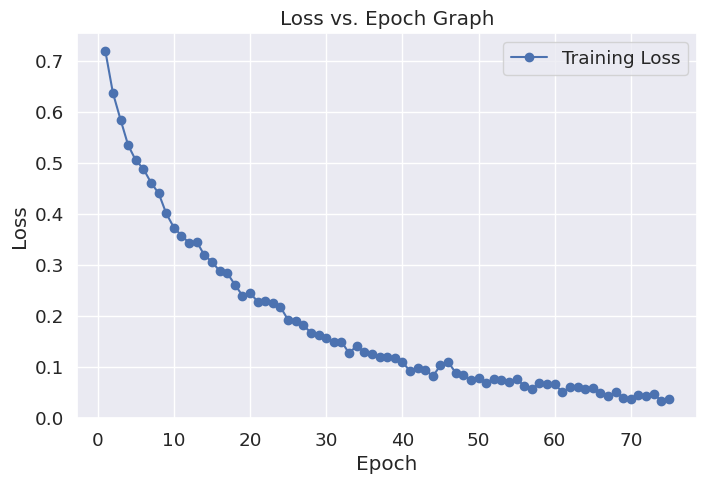

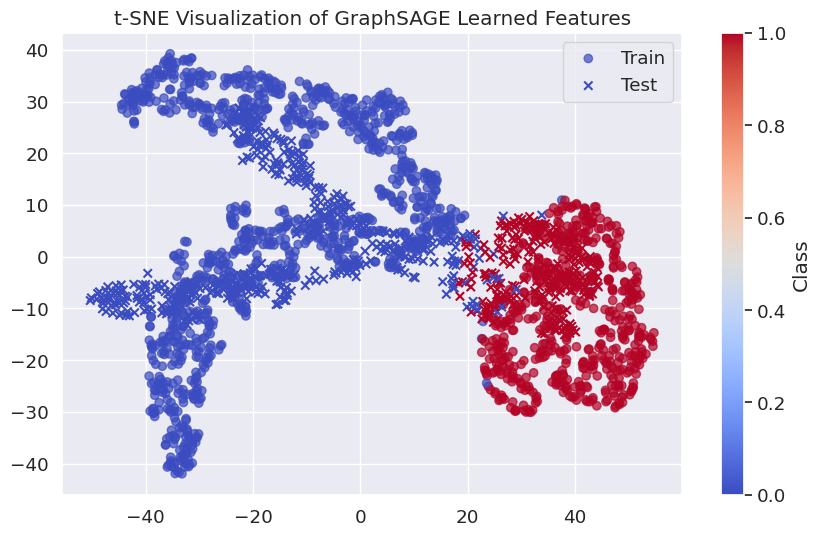

In [ ]:
import torch
from torch_geometric.nn import SAGEConv
import torch.nn.functional as F
import torch.nn as nn
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Define the GraphSAGE model
class GraphSAGEAsteroidClassifier(torch.nn.Module):
    def __init__(self, in_channels, hidden_channels, out_channels):
        super(GraphSAGEAsteroidClassifier, self).__init__()
        self.conv1 = SAGEConv(in_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels, out_channels)

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.relu(x)
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        return F.log_softmax(x, dim=1)

# Initialize the GraphSAGE model
sage_model = GraphSAGEAsteroidClassifier(
    in_channels=X_train_scaled.shape[1],  # Number of input features per node
    hidden_channels=64,                  # Hidden layer size
    out_channels=2                       # Number of output classes
).to(device)

optimizer = torch.optim.Adam(sage_model.parameters(), lr=0.01)  # Optimizer

# Training loop
loss_values = []  # Store loss for plotting

sage_model.train()
for epoch in range(75):  # Train for 75 epochs
    optimizer.zero_grad()
    out = sage_model(graph_train.x, graph_train.edge_index)  # Forward pass
    loss = F.nll_loss(out, graph_train.y)  # Negative log likelihood loss
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights

    loss_values.append(loss.item())  # Store loss for visualization

    if (epoch + 1) % 5 == 0:  # Print progress every 5 epochs
        print(f'Epoch: {epoch + 1}, Loss: {loss.item():.4f}')

# Evaluation on train and test sets
sage_model.eval()
with torch.no_grad():
    # Training set evaluation
    train_pred = sage_model(graph_train.x, graph_train.edge_index).max(dim=1)[1]
    train_acc = accuracy_score(graph_train.y.cpu().numpy(), train_pred.cpu().numpy())

    # Test set evaluation
    test_pred = sage_model(graph_test.x, graph_test.edge_index).max(dim=1)[1]
    test_acc = accuracy_score(graph_test.y.cpu().numpy(), test_pred.cpu().numpy())

    print(f"Train Accuracy: {train_acc:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")

# Plot Loss vs Epoch graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 76), loss_values, marker='o', linestyle='-', color='b', label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch Graph")
plt.legend()
plt.grid(True)
plt.show()

# Extract learned node embeddings from the penultimate layer (hidden representations)
sage_model.eval()
with torch.no_grad():
    train_embeddings = sage_model.conv1(graph_train.x, graph_train.edge_index)
    train_embeddings = F.relu(train_embeddings)
    train_embeddings = sage_model.conv2(train_embeddings, graph_train.edge_index)

    test_embeddings = sage_model.conv1(graph_test.x, graph_test.edge_index)
    test_embeddings = F.relu(test_embeddings)
    test_embeddings = sage_model.conv2(test_embeddings, graph_test.edge_index)

# Convert embeddings to NumPy for t-SNE visualization
train_embeddings_np = train_embeddings.cpu().numpy()
test_embeddings_np = test_embeddings.cpu().numpy()

# Apply t-SNE for dimensionality reduction to 2D space
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
train_embeddings_2d = tsne.fit_transform(train_embeddings_np)
test_embeddings_2d = tsne.fit_transform(test_embeddings_np)

# Convert labels to NumPy for visualization
train_labels = graph_train.y.cpu().numpy()
test_labels = graph_test.y.cpu().numpy()

# Plot t-SNE clusters for train and test sets
plt.figure(figsize=(10, 6))
plt.scatter(train_embeddings_2d[:, 0], train_embeddings_2d[:, 1], c=train_labels,
            cmap="coolwarm", alpha=0.7, label="Train")
plt.scatter(test_embeddings_2d[:, 0], test_embeddings_2d[:, 1], c=test_labels,
            cmap="coolwarm", marker="x", label="Test")
plt.title("t-SNE Visualization of GraphSAGE Learned Features")
plt.legend()
plt.colorbar(label="Class")
plt.show()


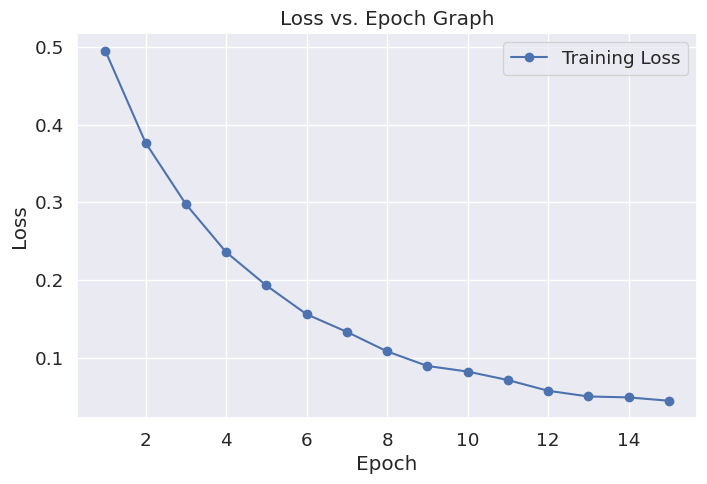

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o', linestyle='-', color='b', label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs. Epoch Graph")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from graphviz import Digraph

# Create a new Digraph object
dot = Digraph(comment="GraphSAGE Model Architecture")

# Input Layer
dot.node("Input", "Input Features (Nodes & Edges)")

# First GraphSAGE Convolution Layer
dot.node("Conv1", "GraphSAGE Conv Layer 1\n(Input → Hidden)")
dot.edge("Input", "Conv1")

# Activation & Dropout
dot.node("ReLU1", "ReLU Activation")
dot.node("Dropout1", "Dropout (p=0.5)")
dot.edge("Conv1", "ReLU1")
dot.edge("ReLU1", "Dropout1")

# Second GraphSAGE Convolution Layer
dot.node("Conv2", "GraphSAGE Conv Layer 2\n(Hidden → Hidden)")
dot.edge("Dropout1", "Conv2")

# Activation & Dropout
dot.node("ReLU2", "ReLU Activation")
dot.node("Dropout2", "Dropout (p=0.5)")
dot.edge("Conv2", "ReLU2")
dot.edge("ReLU2", "Dropout2")

# Fully Connected (Linear) Layer
dot.node("FC", "Fully Connected (Hidden → Output)")
dot.edge("Dropout2", "FC")

# Softmax Activation
dot.node("Softmax", "Log Softmax Activation\n(Class Probabilities)")
dot.edge("FC", "Softmax")

# Output Layer
dot.node("Output", "Predicted Class (0 or 1)")
dot.edge("Softmax", "Output")

# Render and visualize the architecture
dot.render("graphsage_architecture", format="png", cleanup=False)
dot.view()


'graphsage_architecture.pdf'

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       465
           1       0.93      0.95      0.94       215

    accuracy                           0.96       680
   macro avg       0.96      0.96      0.96       680
weighted avg       0.96      0.96      0.96       680



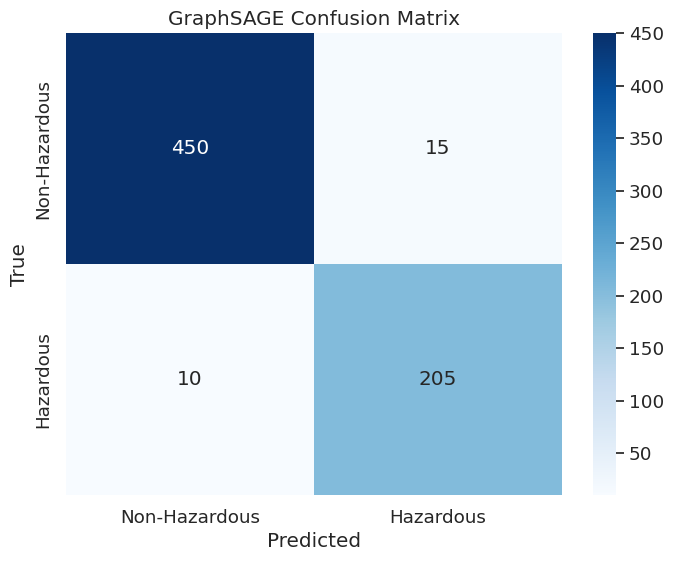

GraphSAGE Performance Metrics:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       465
           1       0.93      0.95      0.94       215

    accuracy                           0.96       680
   macro avg       0.96      0.96      0.96       680
weighted avg       0.96      0.96      0.96       680



In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

with torch.no_grad():
    # Test set predictions
    test_pred = sage_model(graph_test.x, graph_test.edge_index).max(dim=1)[1]

    # Calculate and print classification report
    print(classification_report(graph_test.y.cpu().numpy(), test_pred.cpu().numpy()))

    # Confusion Matrix
    cm = confusion_matrix(graph_test.y.cpu().numpy(), test_pred.cpu().numpy())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Hazardous", "Hazardous"],
                yticklabels=["Non-Hazardous", "Hazardous"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("GraphSAGE Confusion Matrix")
    plt.show()

    #Performance Metrics
    print("GraphSAGE Performance Metrics:")
    print(metrics.classification_report(graph_test.y.cpu(),test_pred.cpu()))


Overall Performance Metrics (Precision, Recall, F1-Score, Support):
Accuracy: 0.9632352941176471
Precision (Macro Average): 0.9550395256916996
Recall (Macro Average): 0.9606151537884471
F1 Score (Macro Average): 0.9577508543025784


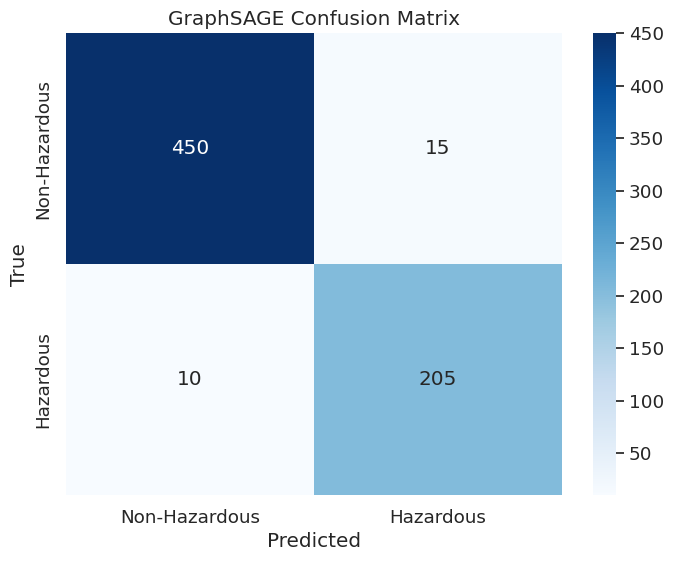

GraphSAGE Full Performance Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       465
           1       0.93      0.95      0.94       215

    accuracy                           0.96       680
   macro avg       0.96      0.96      0.96       680
weighted avg       0.96      0.96      0.96       680



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

with torch.no_grad():
    # Test set predictions
    test_pred = sage_model(graph_test.x, graph_test.edge_index).max(dim=1)[1]

    # Calculate and print classification report
    report = classification_report(graph_test.y.cpu().numpy(), test_pred.cpu().numpy(), output_dict=True)

    # Print the overall metrics from the classification report
    print("Overall Performance Metrics (Precision, Recall, F1-Score, Support):")
    overall_metrics = report['accuracy']  # Accuracy
    precision = report['macro avg']['precision']
    recall = report['macro avg']['recall']
    f1_score = report['macro avg']['f1-score']

    print(f"Accuracy: {overall_metrics}")
    print(f"Precision (Macro Average): {precision}")
    print(f"Recall (Macro Average): {recall}")
    print(f"F1 Score (Macro Average): {f1_score}")

    # Confusion Matrix
    cm = confusion_matrix(graph_test.y.cpu().numpy(), test_pred.cpu().numpy())
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-Hazardous", "Hazardous"],
                yticklabels=["Non-Hazardous", "Hazardous"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("GraphSAGE Confusion Matrix")
    plt.show()

    # Performance Metrics (Full Classification Report)
    print("GraphSAGE Full Performance Report:")
    print(metrics.classification_report(graph_test.y.cpu(), test_pred.cpu()))


Physics-Informed Neural Network

Epoch 0, Loss: 0.5510, Data Loss: 0.6592, Physics Loss: 0.2985, Test Acc: 0.7779, Test F1: 0.6767
Epoch 10, Loss: 0.2637, Data Loss: 0.1973, Physics Loss: 0.4186, Test Acc: 0.9441, Test F1: 0.9181
Epoch 20, Loss: 0.2399, Data Loss: 0.1451, Physics Loss: 0.4611, Test Acc: 0.9426, Test F1: 0.9168
Epoch 30, Loss: 0.2233, Data Loss: 0.1169, Physics Loss: 0.4715, Test Acc: 0.9544, Test F1: 0.9322
Epoch 40, Loss: 0.2181, Data Loss: 0.1100, Physics Loss: 0.4705, Test Acc: 0.9500, Test F1: 0.9267
Epoch 50, Loss: 0.2059, Data Loss: 0.0901, Physics Loss: 0.4762, Test Acc: 0.9544, Test F1: 0.9328
Epoch 60, Loss: 0.2146, Data Loss: 0.0993, Physics Loss: 0.4834, Test Acc: 0.9574, Test F1: 0.9368
Epoch 70, Loss: 0.2024, Data Loss: 0.0829, Physics Loss: 0.4813, Test Acc: 0.9691, Test F1: 0.9532
Epoch 80, Loss: 0.2117, Data Loss: 0.0930, Physics Loss: 0.4887, Test Acc: 0.9632, Test F1: 0.9448
Epoch 90, Loss: 0.2012, Data Loss: 0.0795, Physics Loss: 0.4851, Test Acc: 0.9632, Test F1: 0.9441
Epoch 100, 

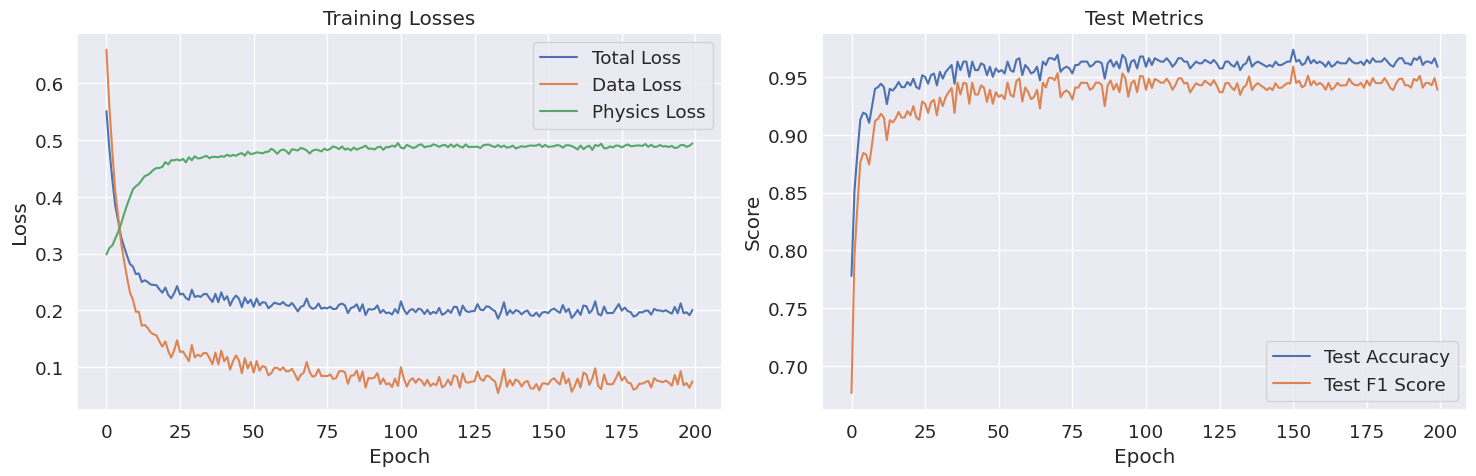

Final Physics-Informed Neural Network Results:
Train - Accuracy: 0.9918, Precision: 0.9765, Recall: 1.0000, F1: 0.9881
Test - Accuracy: 0.9588, Precision: 0.8848, Recall: 1.0000, F1: 0.9389


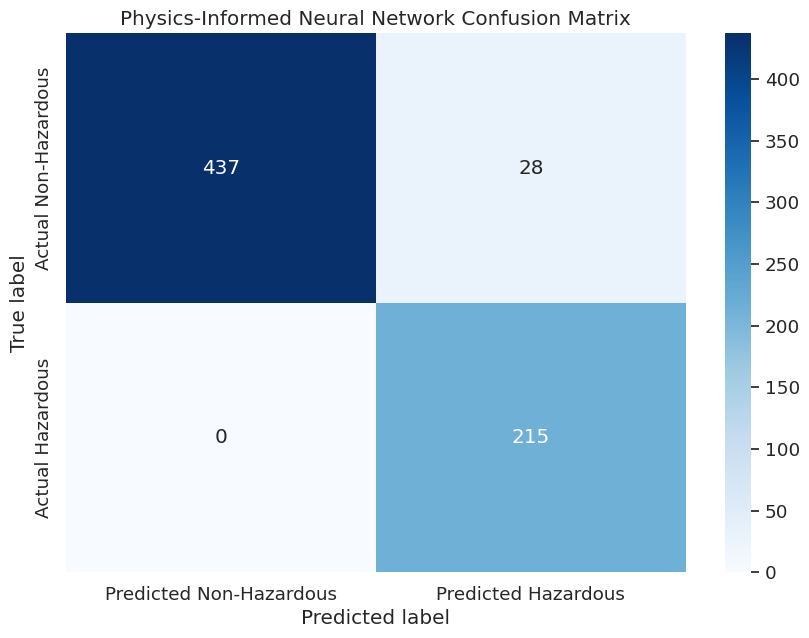

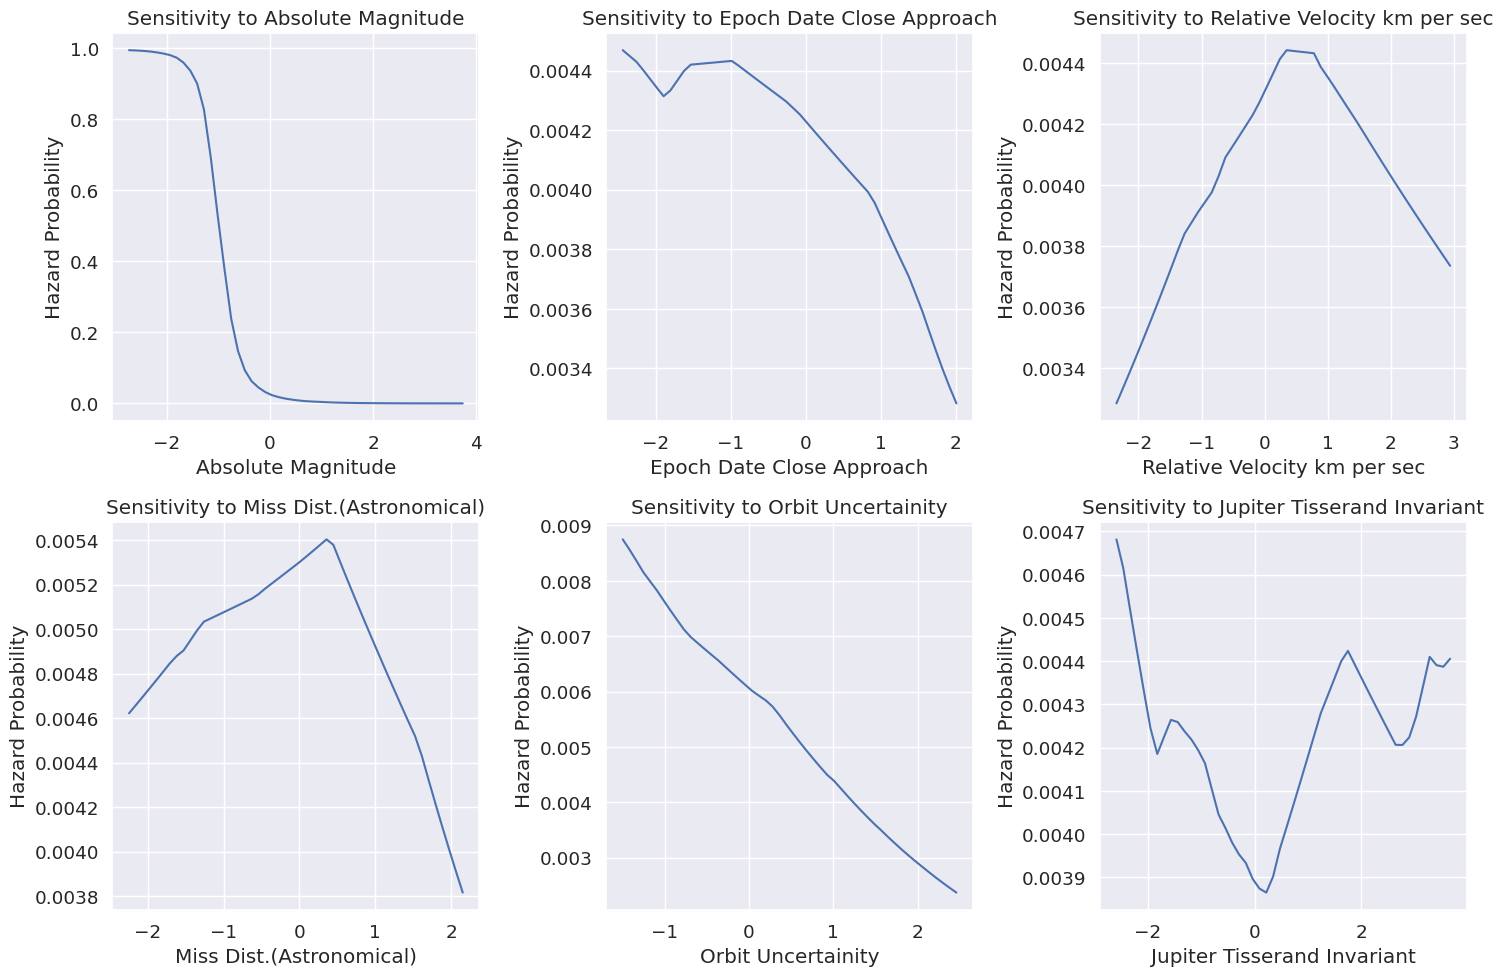

In [ ]:
!pip install torch

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values)

class PhysicsInformedNN(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, dropout=0.3):
        super(PhysicsInformedNN, self).__init__()

        # Neural network layers
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.ReLU(),
            nn.Dropout(dropout),

            nn.Linear(hidden_dim // 2, hidden_dim // 4),
            nn.BatchNorm1d(hidden_dim // 4),
            nn.ReLU(),

            nn.Linear(hidden_dim // 4, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

    def physics_loss(self, x, y_pred):
        """
        Implements physics-based constraints for asteroid hazard prediction.
        For asteroid classification, physical constraints could include:
        1. Minimum Earth MOID (Minimum Orbit Intersection Distance) threshold
        2. Relationship between semi-major axis, eccentricity and perihelion distance
        3. Constraints on asteroid size and velocity

        This is a simplified example, and actual constraints should be
        derived from orbital mechanics equations.
        """
        # Extract relevant columns from input features
        # These indices should match the actual feature indices in your data

        # For demonstration, we'll use:
        # - Index 0: Semi-major axis (au)
        # - Index 1: Eccentricity
        # - Index 2: MOID (Minimum Orbit Intersection Distance)
        # - Index 3: Absolute Magnitude
        # - Index 4: Estimated Diameter

        # Note: Adjust these indices based on your actual dataset structure
        semi_major_axis = x[:, 0]
        eccentricity = x[:, 1]

        # Physics constraint 1: Perihelion distance = a(1-e)
        # Hazardous asteroids generally have perihelion distance < 1.3 AU
        perihelion_distance = semi_major_axis * (1 - eccentricity)

        # Risk increases when perihelion distance is small
        # This is a soft constraint - higher risk (higher y_pred)
        # should correlate with smaller perihelion distance
        perihelion_constraint = torch.mean(
            torch.abs(y_pred.squeeze() - torch.sigmoid(1.3 - perihelion_distance))
        )

        # Physics constraint 2: Semi-major axis constraint
        # Near-Earth Objects typically have a < 1.3 AU
        semi_major_constraint = torch.mean(
            torch.abs(y_pred.squeeze() - torch.sigmoid(1.3 - semi_major_axis))
        )

        # Combine constraints with weights
        physics_constraint = 0.7 * perihelion_constraint + 0.3 * semi_major_constraint

        return physics_constraint

# Training function with physics-informed constraints
def train_pinn(model, X_train, y_train, X_test, y_test, epochs=200, batch_size=64, alpha=0.5):
    """
    Train a Physics-Informed Neural Network

    Parameters:
    - model: The PINN model
    - X_train, y_train: Training data
    - X_test, y_test: Test data
    - epochs: Number of training epochs
    - batch_size: Batch size for training
    - alpha: Weight for physics loss (0: only data loss, 1: only physics loss)
    """
    # Optimizer
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Loss function for data-driven part
    bce_loss = nn.BCELoss()

    # Learning rate scheduler
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=10, verbose=True
    )

    # Create data loader
    train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    # Training history
    history = {
        'train_loss': [],
        'data_loss': [],
        'physics_loss': [],
        'test_acc': [],
        'test_f1': []
    }

    # Training loop
    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        epoch_data_loss = 0
        epoch_physics_loss = 0

        for batch_X, batch_y in train_loader:
            optimizer.zero_grad()

            # Forward pass
            y_pred = model(batch_X)

            # Calculate data loss
            data_loss = bce_loss(y_pred, batch_y.unsqueeze(1))

            # Calculate physics loss
            physics_loss = model.physics_loss(batch_X, y_pred)

            # Combined loss with weighting
            loss = (1 - alpha) * data_loss + alpha * physics_loss

            # Backward pass
            loss.backward()
            optimizer.step()

            # Track losses
            epoch_loss += loss.item()
            epoch_data_loss += data_loss.item()
            epoch_physics_loss += physics_loss.item()

        # Evaluate on test set
        model.eval()
        with torch.no_grad():
            test_preds = model(X_test).squeeze()
            test_pred_binary = (test_preds > 0.5).float()
            test_acc = accuracy_score(y_test.numpy(), test_pred_binary.numpy())
            test_f1 = f1_score(y_test.numpy(), test_pred_binary.numpy())

        # Update learning rate
        scheduler.step(epoch_loss)

        # Store metrics
        history['train_loss'].append(epoch_loss / len(train_loader))
        history['data_loss'].append(epoch_data_loss / len(train_loader))
        history['physics_loss'].append(epoch_physics_loss / len(train_loader))
        history['test_acc'].append(test_acc)
        history['test_f1'].append(test_f1)

        # Print progress
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Loss: {epoch_loss/len(train_loader):.4f}, "
                  f"Data Loss: {epoch_data_loss/len(train_loader):.4f}, "
                  f"Physics Loss: {epoch_physics_loss/len(train_loader):.4f}, "
                  f"Test Acc: {test_acc:.4f}, Test F1: {test_f1:.4f}")

    # Plot training history
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Total Loss')
    plt.plot(history['data_loss'], label='Data Loss')
    plt.plot(history['physics_loss'], label='Physics Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Losses')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history['test_acc'], label='Test Accuracy')
    plt.plot(history['test_f1'], label='Test F1 Score')
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.title('Test Metrics')
    plt.legend()

    plt.tight_layout()
    plt.show()

    return model, history

# Create and train the PINN model
pinn_model = PhysicsInformedNN(input_dim=X_train_scaled.shape[1])
pinn_model, history = train_pinn(
    pinn_model,
    X_train_tensor,
    y_train_tensor,
    X_test_tensor,
    y_test_tensor,
    epochs=200,
    batch_size=64,
    alpha=0.3  # Balance between data and physics loss
)

# Evaluate final model
pinn_model.eval()
with torch.no_grad():
    train_pred = pinn_model(X_train_tensor).squeeze()
    train_pred_binary = (train_pred > 0.5).float().numpy()

    test_pred = pinn_model(X_test_tensor).squeeze()
    test_pred_binary = (test_pred > 0.5).float().numpy()

    # Calculate metrics
    train_acc = accuracy_score(y_train.values, train_pred_binary)
    train_prec = precision_score(y_train.values, train_pred_binary)
    train_rec = recall_score(y_train.values, train_pred_binary)
    train_f1 = f1_score(y_train.values, train_pred_binary)

    test_acc = accuracy_score(y_test.values, test_pred_binary)
    test_prec = precision_score(y_test.values, test_pred_binary)
    test_rec = recall_score(y_test.values, test_pred_binary)
    test_f1 = f1_score(y_test.values, test_pred_binary)

    print("Final Physics-Informed Neural Network Results:")
    print(f"Train - Accuracy: {train_acc:.4f}, Precision: {train_prec:.4f}, Recall: {train_rec:.4f}, F1: {train_f1:.4f}")
    print(f"Test - Accuracy: {test_acc:.4f}, Precision: {test_prec:.4f}, Recall: {test_rec:.4f}, F1: {test_f1:.4f}")

    # Create confusion matrix
    cm = confusion_matrix(y_test.values, test_pred_binary)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Predicted Non-Hazardous', 'Predicted Hazardous'],
                yticklabels=['Actual Non-Hazardous', 'Actual Hazardous'])
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Physics-Informed Neural Network Confusion Matrix')
    plt.show()

# Analyze feature sensitivity by looking at the impact on model predictions
def analyze_feature_sensitivity(model, X_base, feature_indices, feature_names, n_steps=50):
    model.eval()

    plt.figure(figsize=(15, 10))

    for i, feature_idx in enumerate(feature_indices):
        # Create a range of values for the feature
        min_val = X_base[:, feature_idx].min().item() - 0.5
        max_val = X_base[:, feature_idx].max().item() + 0.5
        feature_range = torch.linspace(min_val, max_val, n_steps)

        # Prepare predictions array
        predictions = []

        # Create a base sample
        base_sample = X_base[0].clone().unsqueeze(0)

        # Vary the feature value and collect predictions
        with torch.no_grad():
            for val in feature_range:
                # Copy the base sample and change the feature
                sample = base_sample.clone()
                sample[0, feature_idx] = val

                # Predict with modified sample
                pred = model(sample).item()
                predictions.append(pred)

        # Plot the relationship
        plt.subplot(2, 3, i + 1)
        plt.plot(feature_range.numpy(), predictions)
        plt.xlabel(feature_names[feature_idx])
        plt.ylabel('Hazard Probability')
        plt.title(f'Sensitivity to {feature_names[feature_idx]}')
        plt.grid(True)

    plt.tight_layout()
    plt.show()

# Select some key features for sensitivity analysis
key_feature_indices = [0, 1, 2, 3, 4, 5]  # Adjust based on your feature indexes
feature_names = X_train.columns.tolist()

# Analyze sensitivity
analyze_feature_sensitivity(pinn_model, X_test_tensor, key_feature_indices, feature_names)


SAINT

Training SAINT model for asteroid classification...
Epoch [10/100], Train Loss: 0.0254, Test Loss: 0.0590
Test Metrics - Acc: 0.9794, Prec: 0.9467, Rec: 0.9907, F1: 0.9682
Epoch [20/100], Train Loss: 0.0172, Test Loss: 0.0238
Test Metrics - Acc: 0.9897, Prec: 0.9685, Rec: 1.0000, F1: 0.9840
Epoch [30/100], Train Loss: 0.0062, Test Loss: 0.0141
Test Metrics - Acc: 0.9941, Prec: 0.9817, Rec: 1.0000, F1: 0.9908
Epoch [40/100], Train Loss: 0.0022, Test Loss: 0.0105
Test Metrics - Acc: 0.9971, Prec: 0.9908, Rec: 1.0000, F1: 0.9954
Epoch [50/100], Train Loss: 0.0016, Test Loss: 0.0097
Test Metrics - Acc: 0.9956, Prec: 0.9862, Rec: 1.0000, F1: 0.9931
Epoch [60/100], Train Loss: 0.0022, Test Loss: 0.0106
Test Metrics - Acc: 0.9956, Prec: 0.9862, Rec: 1.0000, F1: 0.9931
Epoch [70/100], Train Loss: 0.0011, Test Loss: 0.0098
Test Metrics - Acc: 0.9956, Prec: 0.9862, Rec: 1.0000, F1: 0.9931
Epoch [80/100], Train Loss: 0.0018, Test Loss: 0.0098
Test Metrics - Acc: 0.9956, Prec: 0.9862, Rec: 1.0000,

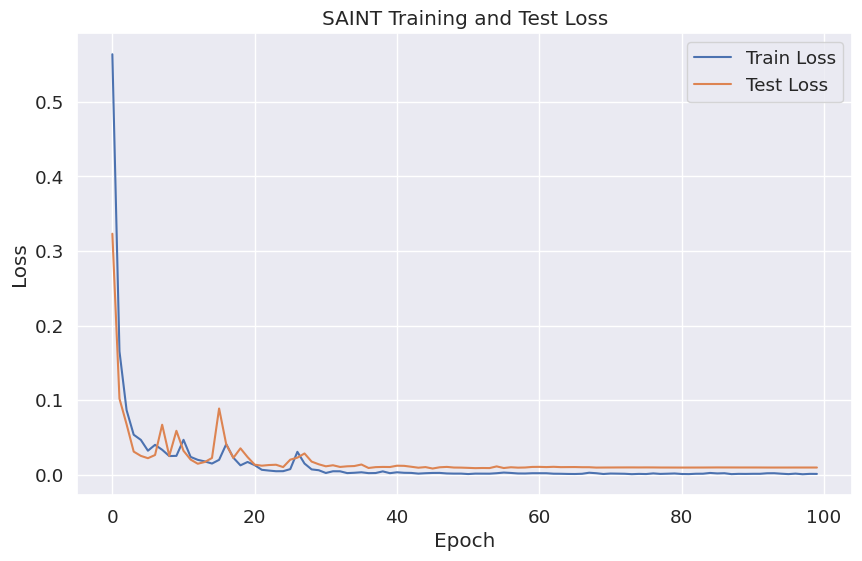

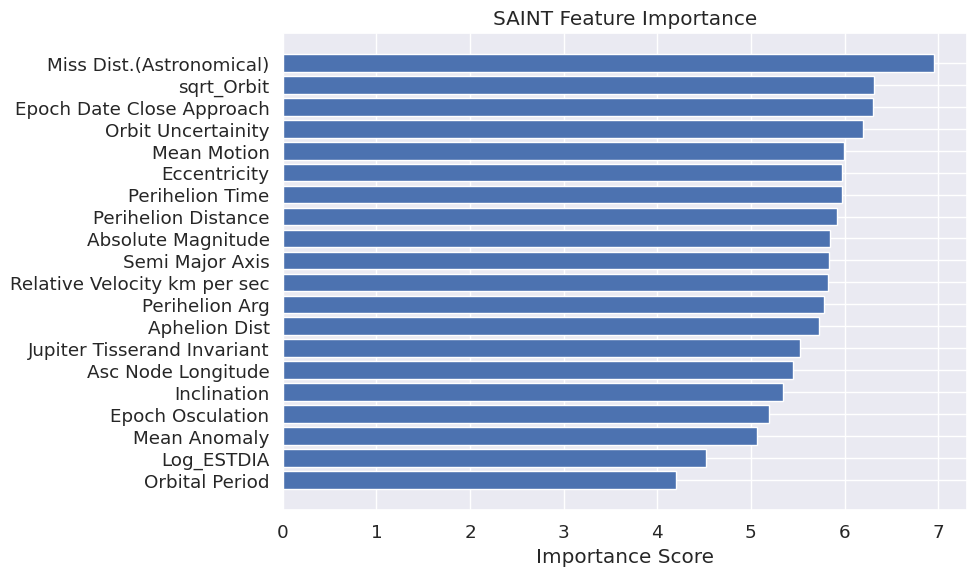

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=100):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * (-math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class FeatureTokenizer(nn.Module):
    def __init__(self, input_dim, embedding_dim):
        super(FeatureTokenizer, self).__init__()
        self.embedding = nn.Linear(1, embedding_dim)

    def forward(self, x):
        return self.embedding(x)

class SAINT(nn.Module):
    def __init__(self, input_dim, num_classes=1, embedding_dim=32, depth=2, heads=4, dropout=0.1):
        super(SAINT, self).__init__()

        self.feature_tokenizer = FeatureTokenizer(1, embedding_dim)
        self.positional_encoding = PositionalEncoding(embedding_dim)

        # Column embedding (one vector per feature)
        self.col_embedding = nn.Parameter(torch.randn(input_dim, embedding_dim))

        # Self-attention transformer encoder for intersample attention
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embedding_dim,
            nhead=heads,
            dim_feedforward=4*embedding_dim,
            dropout=dropout,
            activation='gelu'
        )
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=depth)

        # Self-attention transformer encoder for intrasample attention
        self.transformer_column = nn.TransformerEncoder(encoder_layer, num_layers=depth)

        # MLP head for classification
        self.mlp_head = nn.Sequential(
            nn.Linear(embedding_dim * input_dim, 4 * embedding_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(4 * embedding_dim, num_classes),
            nn.Sigmoid() if num_classes == 1 else nn.Identity()
        )

    def forward(self, x):
        batch_size, num_features = x.shape

        # Reshape to [batch_size * num_features, 1]
        # Use reshape instead of view to ensure contiguous memory layout
        x_reshaped = x.reshape(-1, 1)

        # Tokenize each feature value
        tokens = self.feature_tokenizer(x_reshaped)  # Shape: [batch_size * num_features, embedding_dim]

        # Reshape back to [batch_size, num_features, embedding_dim]
        tokens = tokens.view(batch_size, num_features, -1)

        # Add column embeddings
        tokens = tokens + self.col_embedding.unsqueeze(0)

        # Transpose for intersample attention: [num_features, batch_size, embedding_dim]
        tokens_t = tokens.transpose(0, 1)

        # Apply intersample attention using transformer
        intersample_attn = self.transformer_encoder(tokens_t)

        # Transpose back: [batch_size, num_features, embedding_dim]
        intersample_attn = intersample_attn.transpose(0, 1)

        # Add positional encoding
        intrasample_input = self.positional_encoding(intersample_attn)

        # Transpose for intrasample attention: [num_features, batch_size, embedding_dim]
        intrasample_input_t = intrasample_input.transpose(0, 1)

        # Apply intrasample attention using transformer
        intrasample_attn = self.transformer_column(intrasample_input_t)

        # Transpose back: [batch_size, num_features, embedding_dim]
        intrasample_attn = intrasample_attn.transpose(0, 1)

        # Flatten the features for the MLP head
        features_flat = intrasample_attn.reshape(batch_size, -1)

        # Apply MLP head for classification
        output = self.mlp_head(features_flat)

        return output

def train_saint_model(X_train, y_train, X_test, y_test, epochs=100, batch_size=64, lr=0.001):
    # Standardize features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train_tensor = torch.FloatTensor(X_train_scaled)
    y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1) if hasattr(y_train, 'values') else torch.FloatTensor(y_train).unsqueeze(1)
    X_test_tensor = torch.FloatTensor(X_test_scaled)
    y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1) if hasattr(y_test, 'values') else torch.FloatTensor(y_test).unsqueeze(1)

    # Initialize SAINT model
    input_dim = X_train_scaled.shape[1]
    saint_model = SAINT(
        input_dim=input_dim,
        num_classes=1,  # Binary classification
        embedding_dim=32,
        depth=2,
        heads=4,
        dropout=0.1
    )

    # Loss and optimizer
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(saint_model.parameters(), lr=lr)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=5, verbose=True
    )

    # Create DataLoader
    train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
    train_loader = torch.utils.data.DataLoader(
        train_dataset, batch_size=batch_size, shuffle=True
    )

    # Training loop
    train_losses = []
    test_losses = []

    print("Training SAINT model for asteroid classification...")
    for epoch in range(epochs):
        saint_model.train()
        total_loss = 0

        for batch_X, batch_y in train_loader:
            # Forward pass
            outputs = saint_model(batch_X)
            loss = criterion(outputs, batch_y)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * len(batch_X)

        # Evaluate on test set
        saint_model.eval()
        with torch.no_grad():
            test_outputs = saint_model(X_test_tensor)
            test_loss = criterion(test_outputs, y_test_tensor)
            test_preds = (test_outputs > 0.5).float()

            # Calculate metrics
            test_acc = accuracy_score(y_test_tensor.numpy(), test_preds.numpy())
            test_precision = precision_score(y_test_tensor.numpy(), test_preds.numpy())
            test_recall = recall_score(y_test_tensor.numpy(), test_preds.numpy())
            test_f1 = f1_score(y_test_tensor.numpy(), test_preds.numpy())

        # Store losses
        train_losses.append(total_loss / len(X_train_tensor))
        test_losses.append(test_loss.item())

        # Update learning rate
        scheduler.step(test_loss)

        # Print progress
        if (epoch + 1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}")
            print(f"Test Metrics - Acc: {test_acc:.4f}, Prec: {test_precision:.4f}, Rec: {test_recall:.4f}, F1: {test_f1:.4f}")

    # Final evaluation
    saint_model.eval()
    with torch.no_grad():
        train_outputs = saint_model(X_train_tensor)
        train_preds = (train_outputs > 0.5).float()

        test_outputs = saint_model(X_test_tensor)
        test_preds = (test_outputs > 0.5).float()

        # Calculate metrics
        train_acc = accuracy_score(y_train_tensor.numpy(), train_preds.numpy())
        train_precision = precision_score(y_train_tensor.numpy(), train_preds.numpy())
        train_recall = recall_score(y_train_tensor.numpy(), train_preds.numpy())
        train_f1 = f1_score(y_train_tensor.numpy(), train_preds.numpy())

        test_acc = accuracy_score(y_test_tensor.numpy(), test_preds.numpy())
        test_precision = precision_score(y_test_tensor.numpy(), test_preds.numpy())
        test_recall = recall_score(y_test_tensor.numpy(), test_preds.numpy())
        test_f1 = f1_score(y_test_tensor.numpy(), test_preds.numpy())

    print("\nFinal Results:")
    print(f"Train - Accuracy: {train_acc:.4f}, Precision: {train_precision:.4f}, Recall: {train_recall:.4f}, F1: {train_f1:.4f}")
    print(f"Test - Accuracy: {test_acc:.4f}, Precision: {test_precision:.4f}, Recall: {test_recall:.4f}, F1: {test_f1:.4f}")

    # Plot training curves
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Train Loss')
    plt.plot(test_losses, label='Test Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('SAINT Training and Test Loss')
    plt.legend()
    plt.show()

    # Extract feature importance from SAINT
    def extract_attention_weights(model, data_tensor):
        model.eval()
        with torch.no_grad():
            # Get attention weights from the first transformer layer
            batch_size, num_features = data_tensor.shape

            # Reshape to [batch_size * num_features, 1]
            # Use reshape instead of view to ensure contiguous memory layout
            x_reshaped = data_tensor.reshape(-1, 1) # Changed line to use reshape

            # Tokenize each feature value
            tokens = model.feature_tokenizer(x_reshaped)

            # Reshape back to [batch_size, num_features, embedding_dim]
            tokens = tokens.view(batch_size, num_features, -1)

            # Add column embeddings
            tokens = tokens + model.col_embedding.unsqueeze(0)

            # Transpose for intersample attention: [num_features, batch_size, embedding_dim]
            tokens_t = tokens.transpose(0, 1)

            # Get attention weights from the first layer of the transformer
            # This is an approximation as we can't directly access attention weights
            # We use the transformer's attention mechanism indirectly

            # Since we can't directly access attention, we'll use column embeddings as a proxy for importance
            col_importance = torch.norm(model.col_embedding, p=2, dim=1).detach().cpu().numpy()

            return col_importance

    # Calculate feature importance
    feature_importance = extract_attention_weights(saint_model, X_train_tensor)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sorted_idx = np.argsort(feature_importance)
    feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
    plt.barh([feature_names[i] for i in sorted_idx], feature_importance[sorted_idx])
    plt.xlabel('Importance Score')
    plt.title('SAINT Feature Importance')
    plt.tight_layout()
    plt.show()

    return saint_model, train_losses, test_losses

# Example usage with your asteroid data
saint_model, train_losses, test_losses = train_saint_model(X_train, y_train, X_test, y_test, epochs=100)


In [ ]:
pip install torchviz

SIMCLR

Training SimCLR for self-supervised feature learning...
Epoch [10/100], Loss: 0.6994
Epoch [20/100], Loss: 0.6105
Epoch [30/100], Loss: 0.4547
Epoch [40/100], Loss: 0.4820
Epoch [50/100], Loss: 0.4551
Epoch [60/100], Loss: 0.4278
Epoch [70/100], Loss: 0.4342
Epoch [80/100], Loss: 0.3836
Epoch [90/100], Loss: 0.3852
Epoch [100/100], Loss: 0.3730

Extracting features for downstream classification...
Training linear classifier on learned representations...

Downstream Task Results:
Accuracy: 0.8721, Precision: 0.8036, Recall: 0.8072, F1: 0.8054


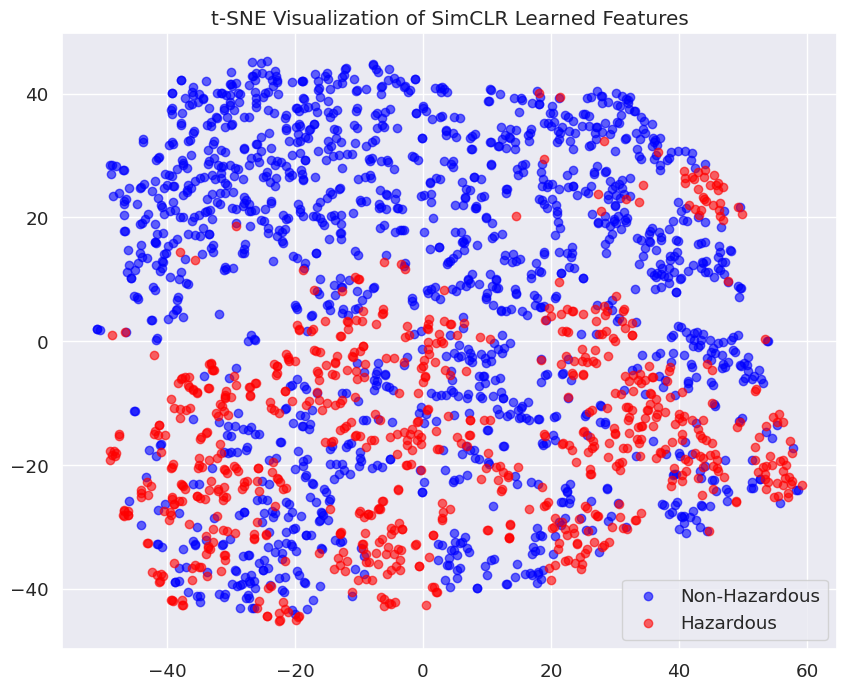

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

class FeatureExtractor(nn.Module):
    def __init__(self, input_dim, hidden_dims=[64, 32], output_dim=128):
        super(FeatureExtractor, self).__init__()

        layers = []
        prev_dim = input_dim

        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.BatchNorm1d(hidden_dim))
            layers.append(nn.ReLU())
            prev_dim = hidden_dim

        layers.append(nn.Linear(prev_dim, output_dim))
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

class ProjectionHead(nn.Module):
    def __init__(self, in_dim, hidden_dim=128, out_dim=64):
        super(ProjectionHead, self).__init__()
        self.projection = nn.Sequential(
            nn.Linear(in_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, out_dim)
        )

    def forward(self, x):
        return self.projection(x)

class AsteroidSimCLR(nn.Module):
    def __init__(self, input_dim, feature_dim=128, projection_dim=64, temperature=0.5):
        super(AsteroidSimCLR, self).__init__()
        self.encoder = FeatureExtractor(input_dim, hidden_dims=[64, 32], output_dim=feature_dim)
        self.projector = ProjectionHead(feature_dim, hidden_dim=128, out_dim=projection_dim)
        self.temperature = temperature

    def forward(self, x1, x2):
        """
        Input:
            x1: First augmented view of the batch
            x2: Second augmented view of the batch
        Output:
            loss: NT-Xent loss
        """
        # Get representations
        h1 = self.encoder(x1)
        h2 = self.encoder(x2)

        # Get projections
        z1 = self.projector(h1)
        z2 = self.projector(h2)

        # Normalize projections
        z1 = F.normalize(z1, dim=1)
        z2 = F.normalize(z2, dim=1)

        # Calculate NT-Xent loss
        loss = self.nt_xent_loss(z1, z2, temperature=self.temperature)

        return loss

    def nt_xent_loss(self, z1, z2, temperature=0.5):
        """
        Compute NT-Xent loss as used in SimCLR
        """
        # Concatenate embeddings from the two views
        batch_size = z1.shape[0]
        features = torch.cat([z1, z2], dim=0)

        # Compute similarity matrix
        sim_matrix = torch.matmul(features, features.T) / temperature

        # Discard the diagonal elements (self-similarity)
        sim_matrix.fill_diagonal_(-float('inf'))

        # Create labels: positives are the corresponding augmented samples
        labels = torch.arange(batch_size, device=sim_matrix.device)
        labels = torch.cat([labels + batch_size, labels], dim=0)

        # For each element, its positive pair is at position (i+batch_size) % (2*batch_size)
        pos_idx = torch.cat([
            torch.arange(batch_size, 2*batch_size),
            torch.arange(0, batch_size)
        ]).to(sim_matrix.device)

        # Extract positive similarity scores
        pos_sim = sim_matrix.gather(1, pos_idx.unsqueeze(1))

        # Compute loss: for each row, the positive pair should have higher similarity than all other elements
        loss = -pos_sim + torch.logsumexp(sim_matrix, dim=1, keepdim=True)

        return loss.mean()

    def get_representations(self, x):
        """Get feature representations for downstream tasks"""
        self.encoder.eval()
        with torch.no_grad():
            return self.encoder(x)

# Feature augmentation for tabular data (same as BYOL)
def augment_features(X, noise_level=0.1, feature_dropout_prob=0.2):
    """
    Augment tabular features by adding noise and randomly masking features
    """
    X_augmented = X.clone()

    # Add Gaussian noise
    noise = torch.randn_like(X) * noise_level * X.std(0)
    X_augmented = X_augmented + noise

    # Random feature dropout (set to mean)
    mask = torch.rand_like(X) > feature_dropout_prob
    X_mean = X.mean(dim=0)
    X_augmented = X_augmented * mask + X_mean * (~mask)

    return X_augmented

def train_simclr_and_evaluate(X, y, epochs=100, batch_size=64, lr=0.001):
    # Standardize data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Convert to tensors
    X_tensor = torch.FloatTensor(X_scaled)
    y_tensor = torch.FloatTensor(y.values) if hasattr(y, 'values') else torch.FloatTensor(y)

    # Initialize SimCLR model
    input_dim = X_scaled.shape[1]
    simclr_model = AsteroidSimCLR(input_dim, feature_dim=128, projection_dim=64, temperature=0.07)

    # Optimizer
    optimizer = torch.optim.Adam(
        list(simclr_model.encoder.parameters()) +
        list(simclr_model.projector.parameters()),
        lr=lr
    )

    # Training loop for self-supervised learning
    print("Training SimCLR for self-supervised feature learning...")
    for epoch in range(epochs):
        simclr_model.train()
        total_loss = 0

        # Process in batches
        indices = torch.randperm(len(X_tensor))
        for start_idx in range(0, len(X_tensor), batch_size):
            idx = indices[start_idx:start_idx+batch_size]
            x_batch = X_tensor[idx]

            # Create two augmented views
            x_view1 = augment_features(x_batch, noise_level=0.1, feature_dropout_prob=0.2)
            x_view2 = augment_features(x_batch, noise_level=0.1, feature_dropout_prob=0.2)

            # Forward pass
            loss = simclr_model(x_view1, x_view2)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item() * len(x_batch)

        # Print progress
        if (epoch + 1) % 10 == 0:
            avg_loss = total_loss / len(X_tensor)
            print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    # Extract features for downstream task
    print("\nExtracting features for downstream classification...")
    simclr_model.eval()
    with torch.no_grad():
        features = simclr_model.get_representations(X_tensor).numpy()

    # Train a linear classifier on the learned representations
    print("Training linear classifier on learned representations...")
    X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=42)

    # Convert y_train and y_test to NumPy arrays
    y_train = y_train.to_numpy()  # or y_train.values
    y_test = y_test.to_numpy()   # or y_test.values

    # Use PyTorch for the linear classifier
    X_train_tensor = torch.FloatTensor(X_train)
    y_train_tensor = torch.FloatTensor(y_train).unsqueeze(1)
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test).unsqueeze(1)

    # Simple linear model
    linear_classifier = nn.Linear(features.shape[1], 1)
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(linear_classifier.parameters(), lr=0.01)

    # Train linear classifier
    for epoch in range(100):
        linear_classifier.train()
        optimizer.zero_grad()

        outputs = linear_classifier(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)

        loss.backward()
        optimizer.step()

    # Evaluate
    linear_classifier.eval()
    with torch.no_grad():
        test_outputs = linear_classifier(X_test_tensor)
        test_preds = (torch.sigmoid(test_outputs) > 0.5).float().numpy()

    # Calculate metrics
    accuracy = accuracy_score(y_test, test_preds)
    precision = precision_score(y_test, test_preds)
    recall = recall_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)

    print("\nDownstream Task Results:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

    # Visualize the learned representations using 2D t-SNE
    from sklearn.manifold import TSNE

    # Apply t-SNE to get 2D embeddings
    tsne = TSNE(n_components=2, random_state=42)
    features_2d = tsne.fit_transform(features)

    # Plot
    plt.figure(figsize=(10, 8))
    y_np = y.values if hasattr(y, 'values') else y
    plt.scatter(features_2d[y_np==0, 0], features_2d[y_np==0, 1], c='blue', label='Non-Hazardous', alpha=0.6)
    plt.scatter(features_2d[y_np==1, 0], features_2d[y_np==1, 1], c='red', label='Hazardous', alpha=0.6)
    plt.title('t-SNE Visualization of SimCLR Learned Features')
    plt.legend()
    plt.show()

    return simclr_model, linear_classifier

# Example usage with your asteroid data
simclr_model, linear_classifier = train_simclr_and_evaluate(X_SMOTE, y_SMOTE, epochs=100)


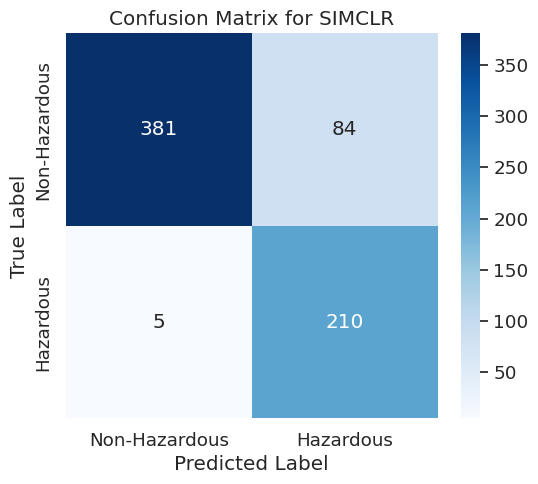

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_preds)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Hazardous', 'Hazardous'], yticklabels=['Non-Hazardous', 'Hazardous'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SIMCLR')
plt.show()


Temporal Fusion Transformer (TFT)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class TemporalFusionTransformer(nn.Module):
    def __init__(self, input_dim, hidden_dim=64, num_heads=4, dropout=0.1):
        super(TemporalFusionTransformer, self).__init__()

        # Feature processing layers
        self.static_encoder = nn.Linear(5, hidden_dim)
        self.orbital_encoder = nn.LSTM(input_dim - 5, hidden_dim, batch_first=True)

        self.static_vsn = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 5),  # Output 5 weights for 5 static features
            nn.Softmax(dim=-1)
        )

        # Attention mechanisms
        self.self_attention = nn.MultiheadAttention(hidden_dim, num_heads, dropout=dropout)

        # Output layers
        self.mlp = nn.Sequential(
            nn.Linear(hidden_dim, hidden_dim//2),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(hidden_dim//2, 1),
            nn.Sigmoid()
        )

    def forward(self, x):  # Ensure this is indented correctly
        # Separate static and orbital features
        static_features = x[:, :5]  # First 5 features as static
        orbital_features = x[:, 5:]  # Remaining features as orbital

        # Process static features
        static_encoded = self.static_encoder(static_features)  # [batch, hidden_dim]
        static_weights = self.static_vsn(static_encoded)  # [batch, 5]
        static_ctx = torch.sum(static_features * static_weights, dim=1)  # [batch, 5]

        # Process orbital features
        orbital_features = orbital_features.unsqueeze(1).repeat(1, 3, 1)  # [batch, 3, feature_dim]
        orbital_encoded, _ = self.orbital_encoder(orbital_features)  # [batch, 3, hidden_dim]

        # Apply self-attention
        attn_out, _ = self.self_attention(
            orbital_encoded.transpose(0, 1),  # [3, batch, hidden_dim]
            orbital_encoded.transpose(0, 1),
            orbital_encoded.transpose(0, 1)
        )
        attn_out = attn_out.transpose(0, 1)  # [batch, 3, hidden_dim]

        # Take last timestep output
        final_rep = attn_out[:, -1, :]  # [batch, hidden_dim]

        # Classification
        return self.mlp(final_rep)



# Initialize and train model
tft_model = TemporalFusionTransformer(input_dim=X_train_scaled.shape[1])
optimizer = torch.optim.Adam(tft_model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# Train
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train.values).unsqueeze(1)

# Training loop
for epoch in range(100):
    tft_model.train()
    optimizer.zero_grad()
    outputs = tft_model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    loss.backward()
    optimizer.step()
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/100], Loss: {loss.item():.4f}')


Epoch [10/100], Loss: 0.7028
Epoch [20/100], Loss: 0.6574
Epoch [30/100], Loss: 0.5176
Epoch [40/100], Loss: 0.3367
Epoch [50/100], Loss: 0.2053
Epoch [60/100], Loss: 0.1691
Epoch [70/100], Loss: 0.1500
Epoch [80/100], Loss: 0.1287
Epoch [90/100], Loss: 0.1138
Epoch [100/100], Loss: 0.0880


Accuracy: 0.9412
Precision: 0.8959
Recall: 0.9209
F1 Score: 0.9083


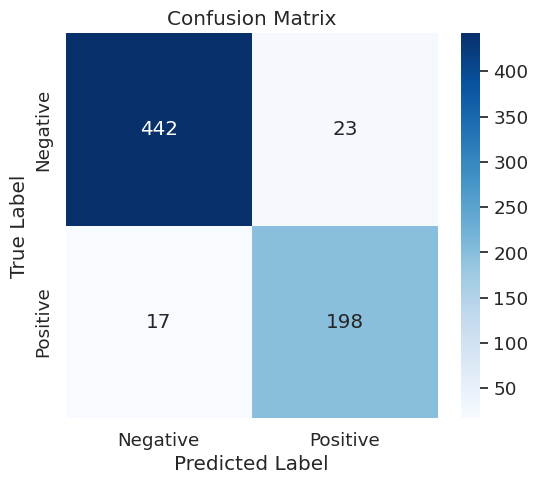

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Set model to evaluation mode
tft_model.eval()

# Convert test data to tensors
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test.values).unsqueeze(1)

# Get model predictions (probabilities)
with torch.no_grad():
    y_pred_probs = tft_model(X_test_tensor)  # Predicted probabilities

# Convert probabilities to binary predictions using 0.5 threshold
y_pred = (y_pred_probs >= 0.5).float()

# Convert tensors to numpy arrays for sklearn
y_true = y_test_tensor.numpy()
y_pred = y_pred.numpy()

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Compute performance metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

# Print performance metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
pip install graphviz


In [ ]:
pip install torchviz

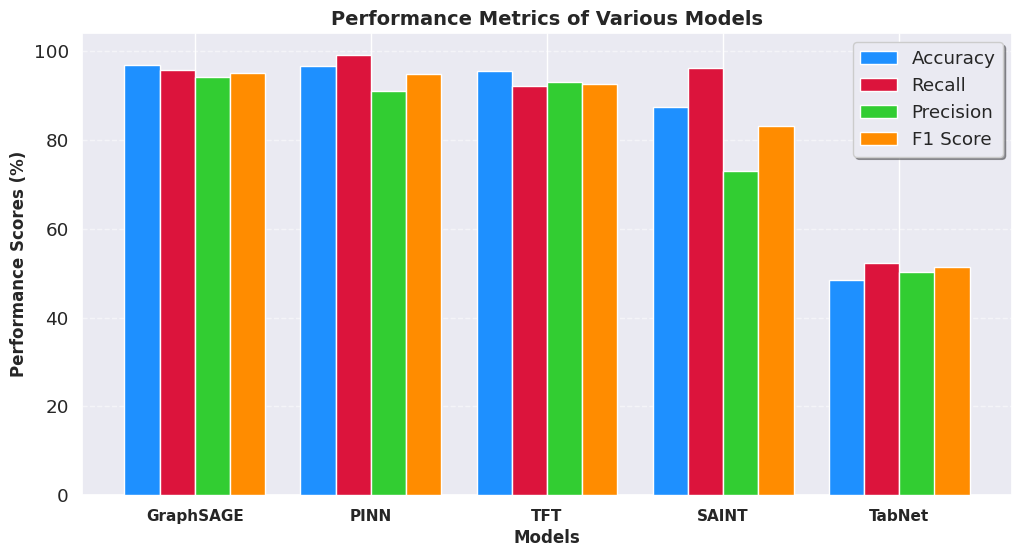

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Updated algorithms and their respective scores
algorithms = ["GraphSAGE", "PINN", "TFT", "SAINT", "TabNet"]
accuracy = [96.83, 96.70, 95.51, 87.50, 48.56]
recall = [95.83, 99.06, 92.10, 96.27, 52.40]
precision = [94.11, 91.09, 92.97, 72.92, 50.29]
f1_score = [94.96, 94.94, 92.53, 83.21, 51.33]

# Set width for bars
bar_width = 0.2
index = np.arange(len(algorithms))

# Create the figure
plt.figure(figsize=(12, 6))

# Grid background behind the bars
plt.grid(axis='y', linestyle='--', alpha=0.5, zorder=0)  # Grid behind bars

# Plot bars (no text displayed on bars)
plt.bar(index, accuracy, bar_width, label="Accuracy", color="#1E90FF", zorder=3)  # Dodger Blue
plt.bar(index + bar_width, recall, bar_width, label="Recall", color="#DC143C", zorder=3)  # Crimson
plt.bar(index + 2 * bar_width, precision, bar_width, label="Precision", color="#32CD32", zorder=3)  # Lime Green
plt.bar(index + 3 * bar_width, f1_score, bar_width, label="F1 Score", color="#FF8C00", zorder=3)  # Dark Orange

# Labels, title, and legend
plt.xlabel("Models", fontsize=12, fontweight='bold')
plt.ylabel("Performance Scores (%)", fontsize=12, fontweight='bold')
plt.title("Performance Metrics of Various Models", fontsize=14, fontweight='bold')

# Make model names bold
plt.xticks(index + 1.5 * bar_width, algorithms, fontsize=11, fontweight='bold')

# Customize legend appearance
plt.legend(frameon=True, fancybox=True, shadow=True, loc="best")

# Display the plot
plt.show()
